# Milestone 1 - EDA and Preprocessing fintech_df 

***Important note For The Person Reading This*** - Some things aren't in their "correct" place such as handling inconsistent fintech_df in Type column being in  [Initial Data Cleaning](#11---initial-fintech_df-cleaning) instead of [Data Cleaning](#4---cleaning-fintech_df) or emp_length encoding also being in [Initial Data Cleaning](#11---initial-fintech_df-cleaning) instead of [Encoding](#52---encoding) <br>
My point is please read the entire notebook before judging thanks <3

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Data

In [2]:
fintech_df = pd.read_csv('fintech_data_49_52_16824.csv')

# 1 - Extraction

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
fintech_df

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
0,YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OF...,Director of Operations,10+ years,OWN,70000.0,NaN,Not Verified,461xx,IN,8529.0,196163.0,213592,Charged Off,23525.0,IN,23525.0,60 months,0.1825,23,15 October 2015,False,Individual,credit_card,Credit card refinancing
1,YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OT...,PROGRAMMER ENGINEER,3 years,RENT,80000.0,NaN,Source Verified,917xx,CA,2890.0,17337.0,90990,Current,10000.0,CA,10000.0,36 months,0.1102,6,19 August 2019,False,Individual,medical,Medical expenses
2,YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceD...,Career Counselor,7 years,RENT,80000.0,NaN,Source Verified,840xx,UT,5099.0,101978.0,171258,Fully Paid,16800.0,UT,16800.0,36 months,0.1153,10,15 June 2015,False,Individual,debt_consolidation,Debt consolidation
3,YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MW...,Program Director/Instructor Medical Lab,4 years,MORTGAGE,65000.0,NaN,Not Verified,783xx,TX,27686.0,359917.0,108300,Current,10800.0,TX,10800.0,36 months,0.1446,15,16 May 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation
4,YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZV...,Truck driver,< 1 year,RENT,60500.0,NaN,Source Verified,021xx,MA,4155.0,41553.0,47169,Current,6025.0,MA,6025.0,36 months,0.1430,15,19 June 2019,False,Individual,vacation,Vacation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27025,YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZT...,Unit Mgr/ER,10+ years,RENT,70000.0,NaN,Not Verified,926xx,CA,4784.0,62198.0,179824,Fully Paid,18000.0,CA,18000.0,60 months,0.1199,14,16 February 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation
27026,YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceD...,Product Engineer,2 years,MORTGAGE,112000.0,NaN,Not Verified,014xx,MA,42001.0,210007.0,3790,Current,2000.0,MA,2000.0,36 months,0.0735,4,18 February 2018,False,Individual,credit_card,Credit card refinancing
27027,YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1...,Officer,10+ years,MORTGAGE,80000.0,140000.0,Not Verified,774xx,TX,4412.0,92647.0,234988,Current,28000.0,TX,28000.0,36 months,0.0667,5,18 October 2018,False,Joint App,credit_card,Credit card refinancing
27028,Yidsc1svVVx4OGFceGQzW1x4ZTlceDFjSVx4YmV9JGpceG...,Credit Suisse,7 years,MORTGAGE,105000.0,NaN,Verified,070xx,NJ,34687.0,346873.0,212103,Current,23000.0,NJ,23000.0,60 months,0.1212,6,13 March 2013,False,INDIVIDUAL,debt_consolidation,Credit Card Consolidation


# Preparing Lookup Table

In [5]:
LookupTable = pd.DataFrame()

# Create a DataFrame with the specified columns
LookupTable = pd.DataFrame({
    'column': [],
    'original': [],
    'imputed': []
})
LookupTable

,column,original,imputed


# 1.1 - Initial Data Cleaning


## Tidying up column names

Remove spaces, special characters, and make all column names lowercase

In [6]:
def fix_column_name(col):
    return col.strip().lower().replace(' ', '_').replace('(', '').replace(')', '')

In [7]:
data_tidy = fintech_df.copy()
data_tidy.columns = [fix_column_name(col) for col in data_tidy.columns]
data_tidy.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description'],
      dtype='object')

## Choosing index column

Choose a column that uniquely identifies each row <br>
CustomerId seems to be a good candidate for this <br>
Let's check if it has any repeated values

In [8]:
# Calculate the number of non-unique values in each column
non_unique_counts = data_tidy.apply(lambda x: x.size - x.nunique())
non_unique_counts

customer_id                0
emp_title              13846
emp_length             27019
home_ownership         27025
annual_inc             24006
annual_inc_joint       26372
verification_status    27027
zip_code               26184
addr_state             26980
avg_cur_bal             9977
tot_cur_bal             1567
loan_id                    0
loan_status            27023
loan_amount            25830
state                  26980
funded_amount          25830
term                   27028
int_rate               26663
grade                  26995
issue_date             26941
pymnt_plan             27028
type                   27025
purpose                27017
description            26260
dtype: int64

> CustomerId has 0 non-unique values and no nulls, so it can be used as the index <br>
> Not using LoanId as multiple customers might have the same LoanId if it's a joint loan

In [9]:
data_indexed = data_tidy.set_index('customer_id')
data_indexed

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
customer_id,,,,,,,,,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,10+ years,OWN,70000.0,NaN,Not Verified,461xx,IN,8529.0,196163.0,213592,Charged Off,23525.0,IN,23525.0,60 months,0.1825,23,15 October 2015,False,Individual,credit_card,Credit card refinancing
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,3 years,RENT,80000.0,NaN,Source Verified,917xx,CA,2890.0,17337.0,90990,Current,10000.0,CA,10000.0,36 months,0.1102,6,19 August 2019,False,Individual,medical,Medical expenses
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,7 years,RENT,80000.0,NaN,Source Verified,840xx,UT,5099.0,101978.0,171258,Fully Paid,16800.0,UT,16800.0,36 months,0.1153,10,15 June 2015,False,Individual,debt_consolidation,Debt consolidation
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,4 years,MORTGAGE,65000.0,NaN,Not Verified,783xx,TX,27686.0,359917.0,108300,Current,10800.0,TX,10800.0,36 months,0.1446,15,16 May 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,< 1 year,RENT,60500.0,NaN,Source Verified,021xx,MA,4155.0,41553.0,47169,Current,6025.0,MA,6025.0,36 months,0.1430,15,19 June 2019,False,Individual,vacation,Vacation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,Unit Mgr/ER,10+ years,RENT,70000.0,NaN,Not Verified,926xx,CA,4784.0,62198.0,179824,Fully Paid,18000.0,CA,18000.0,60 months,0.1199,14,16 February 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,Product Engineer,2 years,MORTGAGE,112000.0,NaN,Not Verified,014xx,MA,42001.0,210007.0,3790,Current,2000.0,MA,2000.0,36 months,0.0735,4,18 February 2018,False,Individual,credit_card,Credit card refinancing
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,Officer,10+ years,MORTGAGE,80000.0,140000.0,Not Verified,774xx,TX,4412.0,92647.0,234988,Current,28000.0,TX,28000.0,36 months,0.0667,5,18 October 2018,False,Joint App,credit_card,Credit card refinancing


## Handling Inconsistent Data in Type Column

Find the unique values in type column

In [10]:
data_indexed['type'].unique()

array(['Individual', 'INDIVIDUAL', 'Joint App', 'DIRECT_PAY', 'JOINT'],
      dtype=object)

Function to fix the type column by combining similar values

In [11]:
def standardize_type_column(df, column_name):
    """
    Standardizes the values in the specified column of the DataFrame.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the column to be standardized.
    column_name (str): The name of the column to be standardized.
    
    Returns:
    pd.DataFrame: The DataFrame with the standardized column.
    """
    mask_joint = df[column_name].str.contains('joint', case=False, na=False)
    mask_individual = df[column_name].str.contains('individual', case=False, na=False)
    mask_direct = df[column_name].str.contains('direct', case=False, na=False)
    
    df.loc[mask_joint, column_name] = 'JOINT'
    df.loc[mask_individual, column_name] = 'INDIVIDUAL'
    df.loc[mask_direct, column_name] = 'DIRECT_PAY'
    
    return df

In [12]:
data_standard_type = standardize_type_column(data_indexed, 'type')

In [13]:
data_standard_type['type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

## Encoding emp_length

In [14]:
def encode_emp_length(dataframe, column_name):
    """
    Encodes the 'emp_length' column in the given DataFrame.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the column to encode.
    column_name (str): The name of the column to encode.
    
    Returns:
    pd.DataFrame: The DataFrame with the encoded column.
    """
    # Remove ' years' and ' year'
    dataframe[column_name +
              '_encoded'] = dataframe[column_name].str.replace(
        ' years', '').str.replace(' year', '')

    # Replace '< 1' with 0 and '10+' with 10
    dataframe[column_name +
              '_encoded'] = dataframe[column_name + '_encoded'].replace(
        {'< 1': 0, '10+': 10})

    # Convert the column to numeric
    dataframe[column_name +
              '_encoded'] = pd.to_numeric(dataframe[column_name + '_encoded'])

    return dataframe




In [15]:
encode_emp_length(data_standard_type, 'emp_length')
data_standard_type['emp_length_encoded'].unique()

array([10.,  3.,  7.,  4.,  0., nan,  2.,  1.,  5.,  6.,  8.,  9.])

In [16]:
# Create a dictionary to map employment lengths to numeric values
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

emp_length_mapping_df = pd.DataFrame(
    list(emp_length_mapping.items()), columns=['original', 'imputed'])

emp_length_mapping_df['column'] = 'emp_length'

LookupTable = pd.concat(
    [LookupTable, emp_length_mapping_df], ignore_index=True)
LookupTable

,column,original,imputed
0,emp_length,< 1 year,0.0
1,emp_length,1 year,1.0
2,emp_length,2 years,2.0
3,emp_length,3 years,3.0
4,emp_length,4 years,4.0
5,emp_length,5 years,5.0
6,emp_length,6 years,6.0
7,emp_length,7 years,7.0
8,emp_length,8 years,8.0
9,emp_length,9 years,9.0


## Encode Grades into their categories (A-G) then replace that with numbers (0-6)

Converting values of grade into their categorical equivalent

In [17]:
# Define the grade ranges
grade_ranges = {
    'A': range(1, 6),
    'B': range(6, 11),
    'C': range(11, 16),
    'D': range(16, 21),
    'E': range(21, 26),
    'F': range(26, 31),
    'G': range(31, 36)
}

In [18]:
# Add grade ranges to the lookup table
for grade, grade_range in grade_ranges.items():
    for number in grade_range:
        LookupTable.loc[len(LookupTable)] = ['grade', number, grade]
LookupTable

,column,original,imputed
0,emp_length,< 1 year,0.0
1,emp_length,1 year,1.0
2,emp_length,2 years,2.0
3,emp_length,3 years,3.0
4,emp_length,4 years,4.0
5,emp_length,5 years,5.0
6,emp_length,6 years,6.0
7,emp_length,7 years,7.0
8,emp_length,8 years,8.0
9,emp_length,9 years,9.0


In [19]:
# Function to map a number to its corresponding grade
def map_number_to_grade(number):
    for grade, grade_range in grade_ranges.items():
        if number in grade_range:
            return grade
    return None

In [20]:
data_standard_type['letter_grade'] = data_standard_type['grade'].apply(map_number_to_grade)
data_standard_type

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,10+ years,OWN,70000.0,NaN,Not Verified,461xx,IN,8529.0,196163.0,213592,Charged Off,23525.0,IN,23525.0,60 months,0.1825,23,15 October 2015,False,INDIVIDUAL,credit_card,Credit card refinancing,10.0,E
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,3 years,RENT,80000.0,NaN,Source Verified,917xx,CA,2890.0,17337.0,90990,Current,10000.0,CA,10000.0,36 months,0.1102,6,19 August 2019,False,INDIVIDUAL,medical,Medical expenses,3.0,B
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,7 years,RENT,80000.0,NaN,Source Verified,840xx,UT,5099.0,101978.0,171258,Fully Paid,16800.0,UT,16800.0,36 months,0.1153,10,15 June 2015,False,INDIVIDUAL,debt_consolidation,Debt consolidation,7.0,B
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,4 years,MORTGAGE,65000.0,NaN,Not Verified,783xx,TX,27686.0,359917.0,108300,Current,10800.0,TX,10800.0,36 months,0.1446,15,16 May 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,4.0,C
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,< 1 year,RENT,60500.0,NaN,Source Verified,021xx,MA,4155.0,41553.0,47169,Current,6025.0,MA,6025.0,36 months,0.1430,15,19 June 2019,False,INDIVIDUAL,vacation,Vacation,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,Unit Mgr/ER,10+ years,RENT,70000.0,NaN,Not Verified,926xx,CA,4784.0,62198.0,179824,Fully Paid,18000.0,CA,18000.0,60 months,0.1199,14,16 February 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,10.0,C
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,Product Engineer,2 years,MORTGAGE,112000.0,NaN,Not Verified,014xx,MA,42001.0,210007.0,3790,Current,2000.0,MA,2000.0,36 months,0.0735,4,18 February 2018,False,INDIVIDUAL,credit_card,Credit card refinancing,2.0,A
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,Officer,10+ years,MORTGAGE,80000.0,140000.0,Not Verified,774xx,TX,4412.0,92647.0,234988,Current,28000.0,TX,28000.0,36 months,0.0667,5,18 October 2018,False,JOINT,credit_card,Credit card refinancing,10.0,A


encode categorical grade to numbers (A-G) to (0-6)

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
data_standard_type['grade_encoded'] = label_encoder.fit_transform(data_standard_type['letter_grade'])

In [22]:
data_standard_type[['grade', 'letter_grade', 'grade_encoded']].sample(5)

,grade,letter_grade,grade_encoded
customer_id,,,
YidrXipceGQ0IFx4ZTBceDhkXHhlNVx4ZjhceGJmXHhkYmdceDlmdFx4OWE4XHg4YnVceGFlXHhmNVx4OGRceDBjVFx4ZGRceGU1XHgxMlx4OGRceGZjXHgxY1x4ZWRcbm8n,26,F,5
YidceGFlXHhhZnxQXHhiY1x4OTdceGY1ZHNkXHg5NVx4MGZ+XHgxZlx4ZjN2XHg5M1x4ZWRmN1x4YmEvXHhiZFx4ZTFJXHhiZGxceGM4M1x4ZDZcXFx4YTAn,8,B,1
YidceGM3LiVFfXh0XHhmZStceGZhZlx4MWZceGUwXHgwNl1ceGRhailceGYyaFx4MGZceGU1W1x4OGJqXHgxNn1ceDA2XHhmOFx4MTZlXHhiMyc=,7,B,1
YidcXGxENFx4YmFceGFmXHhhN1x4YjVceGQzXHhjYVx4YzNceDljXHgxMlx4MDVceDFiWVx4MWVceDAyXHhkMFx4OTZceGVhXHhmMyJceDgxXHgwZipceGVlXHhlMCJ7XHg5ZVx4YmIn,17,D,3
YidceGExXHg5OW1ceGE0TVx4ZWZeUTArXHhmNERceGE5RDdjXHhjNVxyVFx4ZmJceDFhXHgxNlx4ZmRceGZhPlx4YzJceGZlXHhlZVx4ODA9XHhiNlx4OWQn,19,D,3


In [23]:
# Get the mapping dictionary
label_mapping = {index: label for index,
                 label in enumerate(label_encoder.classes_)}

# Convert the label mapping to a DataFrame
label_mapping_df = pd.DataFrame(
    list(label_mapping.items()), columns=['imputed', 'original'])

# Add the 'column' column with the value 'letter_grade'
label_mapping_df['column'] = 'letter_grade'

# Reorder the columns to match the desired order
label_mapping_df = label_mapping_df[['column', 'original', 'imputed']]
label_mapping_df

,column,original,imputed
0,letter_grade,A,0
1,letter_grade,B,1
2,letter_grade,C,2
3,letter_grade,D,3
4,letter_grade,E,4
5,letter_grade,F,5
6,letter_grade,G,6


In [24]:
# Concatenate the new DataFrame with the existing lookup table DataFrame
LookupTable = pd.concat(
    [LookupTable, label_mapping_df], ignore_index=True)
LookupTable

,column,original,imputed
0,emp_length,< 1 year,0.0
1,emp_length,1 year,1.0
2,emp_length,2 years,2.0
3,emp_length,3 years,3.0
4,emp_length,4 years,4.0
5,emp_length,5 years,5.0
6,emp_length,6 years,6.0
7,emp_length,7 years,7.0
8,emp_length,8 years,8.0
9,emp_length,9 years,9.0


## Create a datetime column for issue date

In [25]:
data_standard_type['issue_date_datetime'] = pd.to_datetime(data_standard_type['issue_date'], errors='coerce')

# 2 - Bonus ( Data Integration )

In [26]:
import requests

In [27]:
# Define the endpoint and headers
url = "https://us-states.p.rapidapi.com/basic"
headers = {
    'x-rapidapi-host': "us-states.p.rapidapi.com",
    'x-rapidapi-key': "0ddb3c5aefmshbfa1bc19cc83ae4p1d4045jsn33de395602a2"
}

Get All US State Data (names and Postal Codes)

In [28]:
# Make the GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    state_data = response.json()
    
    # Convert the fintech_df to a DataFrame
    state_df = pd.DataFrame(state_data)
else:
    print(f"Failed to retrieve fintech_df. Status code: {response.status_code}")

In [29]:
state_df

,name,postal,capital,population
0,Alabama,AL,"{'name': 'Montgomery', 'latitude': '32.377716'...","{'density_km': '37', 'total': '5024279', 'dens..."
1,Alaska,AK,"{'name': 'Juneau', 'latitude': '58.301598', 'l...","{'density_km': '<1', 'total': '733391', 'densi..."
2,American Samoa,AS,"{'name': 'Pago Pago', 'latitude': '-14.279444'...","{'density_km': '279', 'total': '49710', 'densi..."
3,Arizona,AZ,"{'name': 'Phoenix', 'latitude': '33.448143', '...","{'density_km': '23', 'total': '7151502', 'dens..."
4,Arkansas,AR,"{'name': 'Little Rock', 'latitude': '34.746613...","{'density_km': '22', 'total': '3011524', 'dens..."
5,California,CA,"{'name': 'Sacramento', 'latitude': '38.576668'...","{'density_km': '97', 'total': '39538223', 'den..."
6,Colorado,CO,"{'name': 'Denver', 'latitude': '39.739227', 'l...","{'density_km': '20', 'total': '5773714', 'dens..."
7,Connecticut,CT,"{'name': 'Hartford', 'latitude': '41.764046', ...","{'density_km': '286', 'total': '3605944', 'den..."
8,Delaware,DE,"{'name': 'Dover', 'latitude': '39.157307', 'lo...","{'density_km': '187', 'total': '989948', 'dens..."
9,Florida,FL,"{'name': 'Tallahassee', 'latitude': '21.307442...","{'density_km': '145', 'total': '21538187', 'de..."


Prepare state fintech_df for integration

In [30]:
# Keep only the 'name' and 'postal_code' columns
state_df_filtered = state_df.filter(['name', 'postal'])

# Display the updated DataFrame
state_df_filtered

,name,postal
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR
5,California,CA
6,Colorado,CO
7,Connecticut,CT
8,Delaware,DE
9,Florida,FL


In [31]:
state_df_filtered.columns = ['state_name', 'state']
state_df_filtered

,state_name,state
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR
5,California,CA
6,Colorado,CO
7,Connecticut,CT
8,Delaware,DE
9,Florida,FL


Join the state fintech_df with the original fintech_df

In [32]:
data_standard_type

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,10+ years,OWN,70000.0,NaN,Not Verified,461xx,IN,8529.0,196163.0,213592,Charged Off,23525.0,IN,23525.0,60 months,0.1825,23,15 October 2015,False,INDIVIDUAL,credit_card,Credit card refinancing,10.0,E,4,2015-10-15
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,3 years,RENT,80000.0,NaN,Source Verified,917xx,CA,2890.0,17337.0,90990,Current,10000.0,CA,10000.0,36 months,0.1102,6,19 August 2019,False,INDIVIDUAL,medical,Medical expenses,3.0,B,1,2019-08-19
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,7 years,RENT,80000.0,NaN,Source Verified,840xx,UT,5099.0,101978.0,171258,Fully Paid,16800.0,UT,16800.0,36 months,0.1153,10,15 June 2015,False,INDIVIDUAL,debt_consolidation,Debt consolidation,7.0,B,1,2015-06-15
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,4 years,MORTGAGE,65000.0,NaN,Not Verified,783xx,TX,27686.0,359917.0,108300,Current,10800.0,TX,10800.0,36 months,0.1446,15,16 May 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,4.0,C,2,2016-05-16
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,< 1 year,RENT,60500.0,NaN,Source Verified,021xx,MA,4155.0,41553.0,47169,Current,6025.0,MA,6025.0,36 months,0.1430,15,19 June 2019,False,INDIVIDUAL,vacation,Vacation,0.0,C,2,2019-06-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,Unit Mgr/ER,10+ years,RENT,70000.0,NaN,Not Verified,926xx,CA,4784.0,62198.0,179824,Fully Paid,18000.0,CA,18000.0,60 months,0.1199,14,16 February 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,10.0,C,2,2016-02-16
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,Product Engineer,2 years,MORTGAGE,112000.0,NaN,Not Verified,014xx,MA,42001.0,210007.0,3790,Current,2000.0,MA,2000.0,36 months,0.0735,4,18 February 2018,False,INDIVIDUAL,credit_card,Credit card refinancing,2.0,A,0,2018-02-18
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,Officer,10+ years,MORTGAGE,80000.0,140000.0,Not Verified,774xx,TX,4412.0,92647.0,234988,Current,28000.0,TX,28000.0,36 months,0.0667,5,18 October 2018,False,JOINT,credit_card,Credit card refinancing,10.0,A,0,2018-10-18


In [33]:
# Merge the data_indexed DataFrame with the state_df_filtered DataFrame on the 'addr_state' column
data_with_state = data_standard_type.merge(state_df_filtered, on='state', how='left').set_index(data_standard_type.index)

# Display the updated DataFrame
data_with_state

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,10+ years,OWN,70000.0,NaN,Not Verified,461xx,IN,8529.0,196163.0,213592,Charged Off,23525.0,IN,23525.0,60 months,0.1825,23,15 October 2015,False,INDIVIDUAL,credit_card,Credit card refinancing,10.0,E,4,2015-10-15,Indiana
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,3 years,RENT,80000.0,NaN,Source Verified,917xx,CA,2890.0,17337.0,90990,Current,10000.0,CA,10000.0,36 months,0.1102,6,19 August 2019,False,INDIVIDUAL,medical,Medical expenses,3.0,B,1,2019-08-19,California
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,7 years,RENT,80000.0,NaN,Source Verified,840xx,UT,5099.0,101978.0,171258,Fully Paid,16800.0,UT,16800.0,36 months,0.1153,10,15 June 2015,False,INDIVIDUAL,debt_consolidation,Debt consolidation,7.0,B,1,2015-06-15,Utah
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,4 years,MORTGAGE,65000.0,NaN,Not Verified,783xx,TX,27686.0,359917.0,108300,Current,10800.0,TX,10800.0,36 months,0.1446,15,16 May 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,4.0,C,2,2016-05-16,Texas
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,< 1 year,RENT,60500.0,NaN,Source Verified,021xx,MA,4155.0,41553.0,47169,Current,6025.0,MA,6025.0,36 months,0.1430,15,19 June 2019,False,INDIVIDUAL,vacation,Vacation,0.0,C,2,2019-06-19,Massachusetts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,Unit Mgr/ER,10+ years,RENT,70000.0,NaN,Not Verified,926xx,CA,4784.0,62198.0,179824,Fully Paid,18000.0,CA,18000.0,60 months,0.1199,14,16 February 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,10.0,C,2,2016-02-16,California
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,Product Engineer,2 years,MORTGAGE,112000.0,NaN,Not Verified,014xx,MA,42001.0,210007.0,3790,Current,2000.0,MA,2000.0,36 months,0.0735,4,18 February 2018,False,INDIVIDUAL,credit_card,Credit card refinancing,2.0,A,0,2018-02-18,Massachusetts
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,Officer,10+ years,MORTGAGE,80000.0,140000.0,Not Verified,774xx,TX,4412.0,92647.0,234988,Current,28000.0,TX,28000.0,36 months,0.0667,5,18 October 2018,False,JOINT,credit_card,Credit card refinancing,10.0,A,0,2018-10-18,Texas


# 3- EDA

### General Observations

#### Understanding The Data

In [34]:
data_with_state.shape

(27030, 28)

In [35]:
data_with_state.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'emp_length_encoded',
       'letter_grade', 'grade_encoded', 'issue_date_datetime', 'state_name'],
      dtype='object')

In [36]:
data_with_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27030 entries, YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw== to YiJceDkzXHhmZlx4YmVceDk3RS02KilceDlmJ1x4ZTlceDg3XHhlN1x4YjdkXHg4N1x4YTMqJ3lceDFiXHgxMC9ceGE2XHhlYlx4YTlhXHhhNlx4YjJhXHhmYSI=
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   emp_title            24665 non-null  object        
 1   emp_length           25156 non-null  object        
 2   home_ownership       27030 non-null  object        
 3   annual_inc           27030 non-null  float64       
 4   annual_inc_joint     1918 non-null   float64       
 5   verification_status  27030 non-null  object        
 6   zip_code             27030 non-null  object        
 7   addr_state           27030 non-null  object        
 8   avg_cur_bal          27030 non-null  float64       
 9   tot_cur_bal   

In [37]:
data_with_state.describe()

,annual_inc,annual_inc_joint,avg_cur_bal,tot_cur_bal,loan_id,loan_amount,funded_amount,int_rate,grade,emp_length_encoded,grade_encoded,issue_date_datetime
count,2.703000e+04,1.918000e+03,27030.000000,2.703000e+04,27030.000000,27030.000000,27030.000000,25788.000000,27030.000000,25156.000000,27030.000000,27030
mean,7.920678e+04,1.315969e+05,13650.118424,1.440843e+05,135189.601221,15420.907325,15420.907325,0.130835,10.950425,5.847869,1.589308,2017-02-11 05:35:50.410654720
min,1.000000e+03,2.500000e+04,0.000000,0.000000e+00,23.000000,1000.000000,1000.000000,0.053100,1.000000,0.000000,0.000000,2012-08-12 00:00:00
25%,4.750000e+04,8.800000e+04,3114.250000,2.930250e+04,67920.500000,8000.000000,8000.000000,0.094300,6.000000,2.000000,1.000000,2015-09-15 00:00:00
50%,6.612350e+04,1.170000e+05,7217.000000,7.918400e+04,135002.500000,13100.000000,13100.000000,0.126200,10.000000,6.000000,1.000000,2017-04-17 00:00:00
75%,9.500000e+04,1.550000e+05,18887.000000,2.153972e+05,202499.250000,20125.000000,20125.000000,0.160200,15.000000,10.000000,2.000000,2018-09-18 00:00:00
max,1.750000e+06,1.750000e+06,555925.000000,4.447397e+06,270293.000000,40000.000000,40000.000000,0.309900,35.000000,10.000000,6.000000,2019-12-19 00:00:00
std,5.705104e+04,7.797524e+04,16908.051093,1.668915e+05,78013.507196,9474.066082,9474.066082,0.048740,6.345608,3.758295,1.236207,NaN


In [38]:
data_with_state.describe(include='object')

,emp_title,emp_length,home_ownership,verification_status,zip_code,addr_state,loan_status,state,term,issue_date,type,purpose,description,letter_grade,state_name
count,24665,25156,27030,27030,27030,27030,27030,27030,27030,27030,27030,27030,26797,27030,27030
unique,13184,11,5,3,846,50,7,50,2,89,3,13,770,7,50
top,Teacher,10+ years,MORTGAGE,Source Verified,112xx,CA,Current,CA,36 months,16 March 2016,INDIVIDUAL,debt_consolidation,Debt consolidation,B,California
freq,471,8837,13256,10686,291,3742,17065,3742,18940,654,25079,15130,14268,7834,3742


#### Getting the distribution of the fintech_df

array([[<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'annual_inc_joint'}>,
        <Axes: title={'center': 'avg_cur_bal'}>],
       [<Axes: title={'center': 'tot_cur_bal'}>,
        <Axes: title={'center': 'loan_id'}>,
        <Axes: title={'center': 'loan_amount'}>],
       [<Axes: title={'center': 'funded_amount'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'grade'}>],
       [<Axes: title={'center': 'emp_length_encoded'}>,
        <Axes: title={'center': 'grade_encoded'}>,
        <Axes: title={'center': 'issue_date_datetime'}>]], dtype=object)

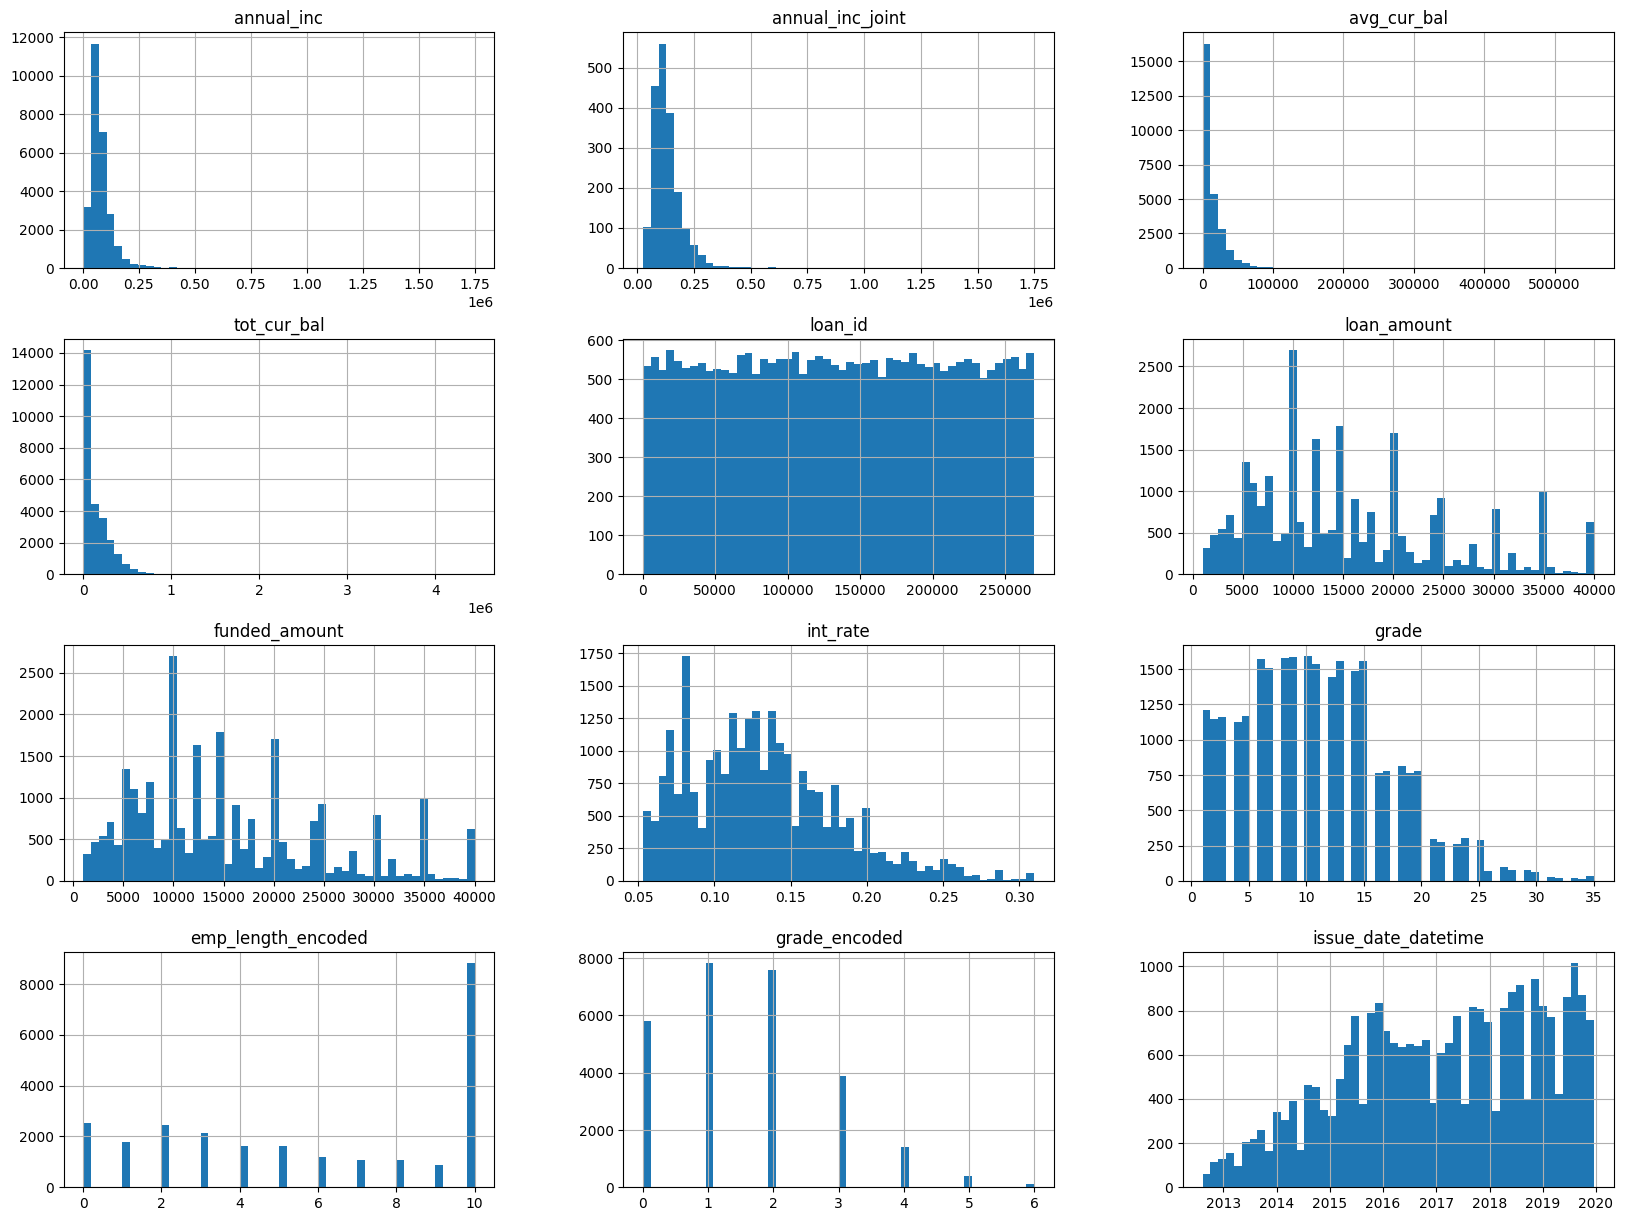

In [39]:
data_with_state.hist(bins=50, figsize=(20, 15))

#### Correlation Matrix and Heatmap

In [40]:
data_with_state[['emp_length', 'emp_length_encoded']].head(10)

,emp_length,emp_length_encoded
customer_id,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,10+ years,10.0
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,3 years,3.0
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,7 years,7.0
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,4 years,4.0
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,< 1 year,0.0
YidceDA0XHhlNlx4YWRALHFoTXhceGNkXHgxOVRceDlmXHhjNFx4ZTJceGVjZFx4ZGRceDlkXHhjYl9ceGQ0XHhjMlx4ZjBceDk2fFx4Y2ZceDkzXHgxM1x4ZGZceGZkXHhiYic=,NaN,NaN
YidnXHhhZVx4ZDRceGFhXHgwZVx4MDhceGFlXHg5ZVx4OTdZXHhjND5ceGMzVVx4OGRbc3xQXHg4OVx4YzVceDgyXHg4YVx4MDJceGZiOVtceGU4XHg4YVx4Y2ZZSyc=,3 years,3.0
YidcXFx4YzFceDE2XHgxMVx4ZWJceGUzJWFceGIxXHgxY1x4MDJzXHhkN1x4ZTRceGU3XHhjOFx4MWFceDdmXHhlNlx4YjhceGRkXHhhNlx4YmZceDg0XHg4NFx4YjRceGNhcVJ5XHg4NT4n,2 years,2.0
YicvXHhiM3tceGYxXHhlZFx4YjJDXHg4OHhceGVlXHhkNVlJXHhmZFx4ZTJceGFjXHhlYVxcXHhiZi44XHhlYlx4YTNceDg4XHg5Ylx4YjVceGRiK3JceDA3XHg3Zlx4OWMn,2 years,2.0


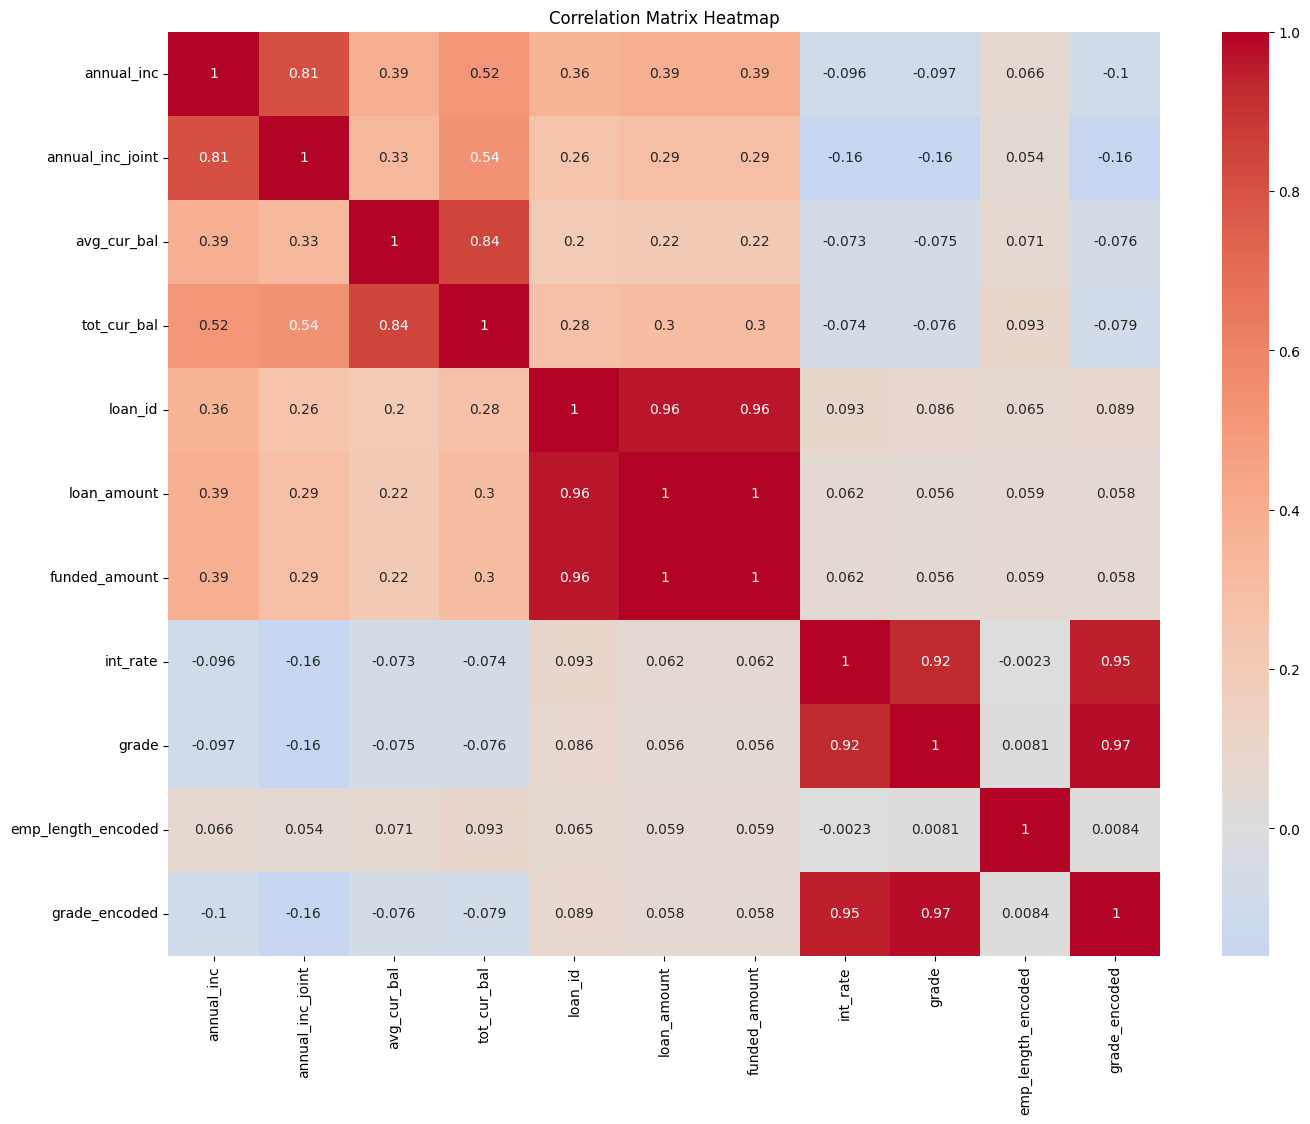

In [41]:
# Select only numeric columns for correlation matrix
numeric_cols = data_with_state.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Relation Between Employment Length and other columns

In [42]:
corr_matrix['emp_length_encoded'].sort_values(ascending=False)

emp_length_encoded    1.000000
tot_cur_bal           0.092808
avg_cur_bal           0.070936
annual_inc            0.066301
loan_id               0.065325
loan_amount           0.059305
funded_amount         0.059305
annual_inc_joint      0.053535
grade_encoded         0.008383
grade                 0.008104
int_rate             -0.002281
Name: emp_length_encoded, dtype: float64

> No Apparent Correlation between emp_length and any other numeric column which suggests that it is MCAR

In [43]:
# Group by employment length and calculate the mean annual income
grouped_data = data_with_state.groupby(
    'emp_length')['annual_inc'].mean().reset_index()
# Calculate mode and median of annual income for each employment length
mode_annual_inc = data_with_state.groupby('emp_length')['annual_inc'].agg(
    lambda x: x.mode()[0]).reset_index(name='mode_annual_inc')
median_annual_inc = data_with_state.groupby(
    'emp_length')['annual_inc'].median().reset_index(name='median_annual_inc')

# Merge mode and median with the grouped fintech_df
grouped_data = grouped_data.merge(mode_annual_inc, on='emp_length').merge(median_annual_inc, on='emp_length')

grouped_data.sort_values('annual_inc', ascending=False)

,emp_length,annual_inc,mode_annual_inc,median_annual_inc
1,10+ years,86657.284368,60000.0,75000.0
7,7 years,82546.745168,60000.0,67000.0
5,5 years,80630.465273,60000.0,65000.0
6,6 years,80507.303946,60000.0,65000.0
9,9 years,80133.566536,60000.0,70000.0
8,8 years,79970.437821,65000.0,67900.0
3,3 years,79017.205872,60000.0,65000.0
4,4 years,77784.996619,50000.0,65000.0
10,< 1 year,77340.046284,50000.0,62000.0
2,2 years,76762.328693,50000.0,65000.0


> Doesn't seem to be any correlation between emp length and annual income 

In [44]:
# Group by employment length and calculate the mean annual income
grouped_data = data_with_state.groupby(
    'emp_length')['loan_amount'].mean().reset_index()
# Calculate mode and median of annual income for each employment length
mode_annual_inc = data_with_state.groupby('emp_length')['loan_amount'].agg(
    lambda x: x.mode()[0]).reset_index(name='mode_loan_amount')
median_annual_inc = data_with_state.groupby(
    'emp_length')['loan_amount'].median().reset_index(name='median_loan_amount')

# Merge mode and median with the grouped fintech_df
grouped_data = grouped_data.merge(mode_annual_inc, on='emp_length').merge(
    median_annual_inc, on='emp_length')

grouped_data.sort_values('loan_amount', ascending=False)

,emp_length,loan_amount,mode_loan_amount,median_loan_amount
1,10+ years,16458.781261,10000.0,15000.0
8,8 years,15833.426966,12000.0,14000.0
10,< 1 year,15687.937550,10000.0,13000.0
9,9 years,15651.958525,10000.0,14425.0
7,7 years,15521.104491,10000.0,14000.0
5,5 years,15503.668311,10000.0,13637.5
3,3 years,15130.202514,10000.0,12500.0
4,4 years,15093.326073,10000.0,12800.0
6,6 years,14843.010980,10000.0,12875.0
2,2 years,14800.061400,10000.0,12000.0


> Doesn't seem to be any correlation between emp length and Loan Amount

### Relation Between int_rate and other columns

In [45]:
corr_matrix['int_rate'].sort_values(ascending=False)

int_rate              1.000000
grade_encoded         0.945638
grade                 0.921598
loan_id               0.093241
loan_amount           0.062209
funded_amount         0.062209
emp_length_encoded   -0.002281
avg_cur_bal          -0.072502
tot_cur_bal          -0.074017
annual_inc           -0.095996
annual_inc_joint     -0.158147
Name: int_rate, dtype: float64

> Interest rate seems to be very correlated to grade

# 4 - Cleaning Data

## Observing and Handling Missing Data

Get the number of missing values in each column and the percentage of missing values

In [46]:
null_counts = data_with_state.isnull().sum()
null_percent = data_with_state.isnull().mean() * 100

pd.DataFrame({
    'null_values': null_counts,
    'null_percent': null_percent
})[null_counts > 0].sort_values(by='null_values', ascending=False)

,null_values,null_percent
annual_inc_joint,25112,92.904181
emp_title,2365,8.749538
emp_length,1874,6.933037
emp_length_encoded,1874,6.933037
int_rate,1242,4.594895
description,233,0.862005


### Imputing Description

> Description seems to be **MCAR** as there is no apparent reason for it to be missing

> Purpose and description seem to match up so imputing description with purpose could be a good idea

In [47]:
data_with_state[['description', 'purpose']].sample(10)

,description,purpose
customer_id,,
YidceDg2XHhmNmBceGY2WVx4ZTZceGVkXHhiMlx4ZjlQd1x4MDZceDk3XHhiNlx4MDhceDgwaHVceDE1XHgxMFx4YjdceDgxXHg5N1x4ZWRceDhiXHRjIlx4YzRceDAwXHhlY1x4Yzcn,Debt consolidation,debt_consolidation
YidcbjhceDk2VVx4YWNnXHhhZFx4ZGJceDA1XHgxN1x4OTZceGJiXHhiYjJceDkzXHg5Nlx4MWRsalx4YTRkdlx4ODg2XHgxM1x4OWE3XHgxYyxceGE3XHhjMkQn,Other,other
YiJceGQ5XHhmYVx4ZTBceDk5XHgxMXNceDlhXHgwNlx4MThccmtceGI0XHg5YVx4ZjM8XHhiNVx4YTQnXHhiZlx4ODNceGJiMXFceDk0XHgxYlx4MTVceGU2XHhjN0p0XHhmNVx4ODki,Debt consolidation,debt_consolidation
YidiXHg4Mlx4OTRXPyhIXHhkOVBceGYyXHhhYyBceGE1WVx4MGI4Zlx4ZWVXLkhGRlx4YjFRXHgwZlx4YzRIXHg5OUFceGIyXHhmNyc=,Other,other
YidceDA4XHhmM1x4ODRceDE3XHhmM2RzXHg5YkBceGYxXHgwMlx4OTVceGU1XHhjZFx4ZWQmXHhjMntceGFhXHgxNVx4ZmE7a1x4YTBceDljXHg4NVx4YjFUKVx4ODBceDAxRCc=,Debt consolidation,debt_consolidation
YidceGIxXHgwZVx4Y2IxXHgxMlx4ZGVNXHg4Y1x4ZGNoTFx4MDdceDgzZVRceDlhRFx4MTlceGEzXHhhMFx4YzZ9XHgwM1x4ZWJceDE0WWxceGQ2Rlx4ZjRceGZjXHIn,Debt consolidation,debt_consolidation
YichXHhjNVx4OTBceDEwM1x4ZDNceDgzXHhkNFx4YTRYXHhlN2svXHhkMFx4MDdjd0hoXHJceDBmQFZceGM3Ylx4ZDhceGI5XHgxM1x4MWJceDE3XHgxMlsn,Credit card refinancing,credit_card
YidceGU3XHgwMVx4ODhtbVxcXHgxMFx4YzVceGM2blx4ZDJceDFmXHhhZT9ceGNhXHhmOVx4ZjctMVx4MWRceDE5OFx4ZWNUdFx4ZmFRIE1ceDk3XHgxNF8n,Debt consolidation,debt_consolidation
Yic/XHhhY1x4OTlceGVlZW9ceGVic1x4MDJHdFx4YjltXHgxYVx4ZjZceGNkXHhkNl1ceGY0XHgxMlx4YjlceDg1XHhkMVlceDAwXHg5NGkzXHhjYlx4MGVqNSc=,Credit card refinancing,credit_card


In [48]:
data_description_imputed = data_with_state.copy()
data_description_imputed['description'] = data_description_imputed['description'].fillna(data_description_imputed['purpose'])
data_description_imputed['description'].isnull().sum()  # Verify that there are no more null values

0

In [49]:
data_description_imputed.sample(10)

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGQyXHg5NzJceDBjRlx4YzVZXHhjOVx4ZjFceGJhXHhkYlx4MTdoXHgwN2pZXHgwYnZceDEzXHhlNG5ceDE3Nz9ceGQ4XHgxZlx4MTBceGI2XHhiNFx4ZjVceDE0PCc=,PSR,10+ years,RENT,47000.0,NaN,Verified,900xx,CA,4425.0,66371.0,31296,Current,5000.0,CA,5000.0,36 months,0.1349,11,16 July 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,10.0,C,2,2016-07-16,California
YidceDBlT1x4ZWF8XHhlOU1ceGY2XHg5NTJhTFx4ODhceGJmOnNceDE2XHg4ZmJceGU2XHhlYk1ceDkzSlx4ZTQmX1x4YzhceGZlXHhmY1xyXlx4ZjAn,Manager,10+ years,RENT,65000.0,NaN,Verified,331xx,FL,1258.0,15098.0,192556,Current,20000.0,FL,20000.0,36 months,0.1149,10,17 January 2017,False,INDIVIDUAL,debt_consolidation,Debt consolidation,10.0,B,1,2017-01-17,Florida
YicjNHVceDk4ey9cblx4YWFxXFxye1x4YTFceGVlVFx4ODZceGY4P1x4ODRceDhkeVx4MGNceGYyXHhhNTxceGJkXHgwY1x4YTBceGM1XHhlOFx4YWJRJw==,Nursing Coordinator,9 years,RENT,45000.0,NaN,Source Verified,112xx,NY,2799.0,22395.0,209419,Current,22000.0,NY,22000.0,36 months,0.1033,9,19 November 2019,False,INDIVIDUAL,debt_consolidation,Debt consolidation,9.0,B,1,2019-11-19,New York
YidceGM3XHhkM19ralxcXHg4N1ZceDA2WVx4OWRceDE1a1x4ODckXG5ceGU1XHg5MVx4MDVceGMzXVx4ZjNceGI3dH5ceGIxXHgxOFx4ODUwXHhlMk9ceGVhJw==,Manager,3 years,MORTGAGE,174000.0,NaN,Verified,070xx,NJ,10595.0,275462.0,259766,Late (31-120 days),35000.0,NJ,35000.0,60 months,0.1505,12,17 May 2017,False,INDIVIDUAL,debt_consolidation,Debt consolidation,3.0,C,2,2017-05-17,New Jersey
YidceGY1XHgxYVx4ZTlceGNhXHhlMV5ceGYzSk1eXHhkYzBYXHg4OGtceGViXHhhMFx0XHg5YnFceGZkI1x4ZTJceGJhXHhmNlx4ZGJceDg4XHhlMlx4OGZBSjYn,Engineer,3 years,MORTGAGE,80000.0,NaN,Not Verified,857xx,AZ,22514.0,337712.0,227646,Fully Paid,25000.0,AZ,25000.0,60 months,0.1333,14,15 August 2015,False,INDIVIDUAL,debt_consolidation,Debt consolidation,3.0,C,2,2015-08-15,Arizona
YidceDAyXHhkYlx4MDFceGFmOVxuXVx4MTV5Jlx4YjBceGVkXHhmODd6XHgwNiRceDAzXHhmY1x4ZjdceGNhXHhmOFx4ZTNceGJhclx4MTNccl9ceGQ5XHhkY1x4ZDhxJw==,Teacher,3 years,MORTGAGE,41000.0,137000.0,Verified,779xx,TX,15454.0,262718.0,250143,Current,32000.0,TX,32000.0,60 months,0.1614,14,19 February 2019,False,JOINT,home_improvement,Home improvement,3.0,C,2,2019-02-19,Texas
YiJhXHhiYllceGNhcn1ceDkwIShceGM0XHgwNlx4MTc9Q1x4YThceGJkN1x4MDFceGI0WEZ5XHhjZVx4ODdkZVx4YjFceDk1J1x4MWVceDA2SyI=,NaN,NaN,MORTGAGE,62000.0,NaN,Source Verified,933xx,CA,29704.0,267335.0,18093,Current,4000.0,CA,4000.0,36 months,0.1091,6,18 January 2018,False,INDIVIDUAL,credit_card,Credit card refinancing,NaN,B,1,2018-01-18,California
Yid9XHgwY1x4MTdceGVmXHgwNWxceGZiXHhjZFx4YjB4XHg4MFx4OGNceDkzXHhjM1x4ZjJceGUzXHhhZX5ceGI0NDJceGQwJlx4OTR+XHhkMVx4YTFceDAxXHhlZVx4YWJceDk3XHg4MCc=,Software Consultant,< 1 year,RENT,96000.0,120000.0,Verified,462xx,IN,1122.0,3365.0,42895,Current,6000.0,IN,6000.0,36 months,0.1139,7,17 May 2017,False,JOINT,vacation,Vacation,0.0,B,1,2017-05-17,Indiana
YidceDk1XHgxOFx4YWFceDkxXHgwZVx4YzFceGVlXHhkOFx4OWJceGM0XHhiNTlceGExXHhlZlx4YjhceDFiXHg4ZFNhXHgxMiswXHg4Mlx4YWFwXHhlZVx4OTNcdFx4OTdceGU4XHhiOFx4YTYn,Key Account Manager,10+ years,RENT,103000.0,NaN,Not Verified,902xx,CA,8744.0,104922.0,18709,Fully Paid,4000.0,CA,4000.0,36 months,0.1269,11,15 March 2015,False,INDIVIDUAL,debt_consolidation,Debt consolidation,10.0,C,2,2015-03-15,California


### Imputing emp_title

In [50]:
# Filter the DataFrame to include only rows where both 'emp_length' and 'emp_title' are null
null_emp_length_and_title = data_description_imputed[data_description_imputed['emp_length'].isnull() & data_description_imputed['emp_title'].isnull()]

# Count the number of such rows
num_null_emp_length_and_title = null_emp_length_and_title.shape[0]
print('null emp_length:', data_description_imputed['emp_length'].isnull().sum(), '\nnull emp_title:', data_description_imputed['emp_title'].isnull().sum())
null_emp_length_and_title.isnull().sum()


null emp_length: 1874 
null emp_title: 2365


emp_title              1870
emp_length             1870
home_ownership            0
annual_inc                0
annual_inc_joint       1636
verification_status       0
zip_code                  0
addr_state                0
avg_cur_bal               0
tot_cur_bal               0
loan_id                   0
loan_status               0
loan_amount               0
state                     0
funded_amount             0
term                      0
int_rate                 71
grade                     0
issue_date                0
pymnt_plan                0
type                      0
purpose                   0
description               0
emp_length_encoded     1870
letter_grade              0
grade_encoded             0
issue_date_datetime       0
state_name                0
dtype: int64

In [51]:
data_description_imputed[data_description_imputed['emp_length'].notnull() & data_description_imputed['emp_title'].isnull()]

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGFhXHJceGRhXHg4MVFceGE5XHgxZENceGQyRFx4ODFceDg3XHhlZFx4MDFceGRhS1x4YzhgXHhlZVx4OGVceDFkXHhjMFx4Y2RJXHhhNVx4MDVceDliXHhlNlx4ZjVceGFiXHR1Jw==,NaN,< 1 year,RENT,53200.0,NaN,Source Verified,330xx,FL,2879.0,46059.0,236695,Current,28000.0,FL,28000.0,60 months,0.1240,8,19 June 2019,False,INDIVIDUAL,debt_consolidation,Debt consolidation,0.0,B,1,2019-06-19,Florida
YidceGZjXHhjNiYvXHgwYlx4Zjg+alxcXHg4Zlx4ZmJceDE5Vlx4OTUvXHhhOVxuXHhkYVFceDA4XHhlOC9ceDAzXHg4OS5ceDFlXHgxM1x4OTZceGUyYVx4YmJceGY2Jw==,NaN,< 1 year,RENT,130000.0,NaN,Not Verified,088xx,NJ,3621.0,21724.0,23535,Current,4800.0,NJ,4800.0,36 months,0.1072,6,18 November 2018,False,INDIVIDUAL,small_business,Business,0.0,B,1,2018-11-18,New Jersey
YidceGNhXHhhMlx4ZTNUXHhlN1x4ODdceDA3bFx4MTJceGZiKH5ceDA3R1x4ODRmXHg4OFx4ZjVVXHhkMVx4ZjlceDkxZ1x4ZjZceGM0XHhiY1x4ZmJceDBiXHhiN1x4OTJceGQ2Yic=,NaN,2 years,MORTGAGE,14000.0,96000.0,Verified,490xx,MI,4809.0,48091.0,160787,Current,15600.0,MI,15600.0,60 months,0.1691,14,19 January 2019,False,JOINT,credit_card,Credit card refinancing,2.0,C,2,2019-01-19,Michigan
YidceDliXzheXHgxZFx4ZWZceGJmYlx4YmMjXHhhOVx4YzdceGVlXHhkMFx4OTFceGZhMVx4ZTAzTVx4OTNyXHg4ZFx4ZjlceDllXHhjOVx4ZTFceDkwXHhhYlx4YjR0XHg5Nyc=,NaN,< 1 year,OWN,89000.0,NaN,Not Verified,958xx,CA,2740.0,38364.0,216946,Current,24000.0,CA,24000.0,36 months,0.1557,15,19 June 2019,False,INDIVIDUAL,debt_consolidation,Debt consolidation,0.0,C,2,2019-06-19,California
YiJceGQzXHhmMiFceDA1LCdceDk0XHhlM1x4MTVZR1x4YjhbRFx4ZGZDXHhmZVNzXHhlN1x4Y2VhV1x4OTU+XHhmM2VceGI3XHhjMVx4ZWJceGE0XG4i,NaN,< 1 year,OWN,52000.0,NaN,Not Verified,850xx,AZ,2152.0,8608.0,76582,Current,9000.0,AZ,9000.0,36 months,0.1447,11,18 December 2018,False,INDIVIDUAL,credit_card,Credit card refinancing,0.0,C,2,2018-12-18,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGE5XHhjMlx4MWVceGIxXHhkN1x4YTFceGE5XG5ceGZjalx4ODJceDk5XHhlZlx4ODFceGFjMVhceGVkXHhmYVx4OTlceGFhaFx4YjVIT1x4ZmNceGZjR1x4ODktXHg4OTsn,NaN,< 1 year,RENT,180000.0,NaN,Not Verified,971xx,OR,6829.0,68288.0,235082,Current,28000.0,OR,28000.0,36 months,0.0702,4,18 December 2018,False,INDIVIDUAL,debt_consolidation,Debt consolidation,0.0,A,0,2018-12-18,Oregon
YidceDg3XHgwZlx4ZThAXHhjNlJceDhhWVx4OThceDkzXHgwMFx4YjlceGJmXHhkZDJceGE5c3lceGRjXHgwNlx4ODk1Rlx4ODdkWVx4ZTZceGJhallceDEwaCc=,NaN,< 1 year,RENT,120000.0,NaN,Not Verified,801xx,CO,4670.0,28021.0,52934,Current,7000.0,CO,7000.0,36 months,0.0881,5,19 April 2019,False,INDIVIDUAL,debt_consolidation,Debt consolidation,0.0,A,0,2019-04-19,Colorado
YidQXHhlM1x4ZTlceDhiXHRceDFlc1x4YmVIXHhhZFx4YzZceDFjXHgxY1x4ZmViXHg5YmdceDhmM1x4OGZceGZkXHgwNFgyXHhjYlx4ZmVCO1x4YzhceDk2XHhkZFx4MTcn,NaN,< 1 year,MORTGAGE,67000.0,NaN,Not Verified,300xx,GA,1286.0,9001.0,90860,Current,10000.0,GA,10000.0,36 months,0.1102,9,19 April 2019,False,INDIVIDUAL,credit_card,Credit card refinancing,0.0,B,1,2019-04-19,Georgia


In [52]:
filtered_df = data_description_imputed[data_description_imputed['emp_title'].isnull() & ((data_description_imputed['emp_length_encoded'] == 0) | (data_description_imputed['emp_length_encoded'].isnull()))]
filtered_df

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceDA0XHhlNlx4YWRALHFoTXhceGNkXHgxOVRceDlmXHhjNFx4ZTJceGVjZFx4ZGRceDlkXHhjYl9ceGQ0XHhjMlx4ZjBceDk2fFx4Y2ZceDkzXHgxM1x4ZGZceGZkXHhiYic=,NaN,NaN,RENT,11724.0,NaN,Verified,305xx,GA,1348.0,4043.0,21229,Current,4225.0,GA,4225.0,36 months,0.1408,15,17 June 2017,False,INDIVIDUAL,debt_consolidation,Debt consolidation,NaN,C,2,2017-06-17,Georgia
YidceDg4XHgxNFx4MDhceDExXHgwM1x4ZGNceGYyJCB6XHhmMF9XXHhiNiFceGRkXHhkZFx4ODhceDBjRlRoXHgxY3dceDgxXHhmY1x4Y2VceGJiXHhhME5zXHg4OCc=,NaN,NaN,RENT,37000.0,NaN,Verified,787xx,TX,2962.0,17770.0,160052,Charged Off,15475.0,TX,15475.0,60 months,NaN,23,15 January 2015,False,INDIVIDUAL,credit_card,Credit card refinancing,NaN,E,4,2015-01-15,Texas
YidceGE2XHhhM3RjXHhjZEtceGQ5XHg5Ylx4ZjJceGQwUFx4MWZceDEyXHg3Zlx4ZGRceDg3Mlx4YWNiLVx4OGRceDBlXHgwOEFceDAwXHhmY1x4Y2VWZ1x4ZWJceGY5XHhmOSc=,NaN,NaN,MORTGAGE,57696.0,NaN,Verified,750xx,TX,4152.0,99648.0,80846,Fully Paid,9750.0,TX,9750.0,36 months,0.0917,7,15 October 2015,False,INDIVIDUAL,credit_card,Credit card refinancing,NaN,B,1,2015-10-15,Texas
YidceDEyXHhmM1x4YjZcJ0BKXHhmOFx4OTJceGNmXHhjN3dceGM0OVx4MDg0aVx4ZjQiaVx4YzNuXHhkNDJceGYwXHhkNkcyUkNceDliXHhmYVx4OGUn,NaN,NaN,MORTGAGE,42000.0,NaN,Verified,800xx,CO,7864.0,180871.0,169709,Charged Off,16100.0,CO,16100.0,36 months,0.1699,16,14 July 2014,False,INDIVIDUAL,credit_card,Credit card refinancing,NaN,D,3,2014-07-14,Colorado
Yic1XHgxZlx4ZmZ5XHhkNlx4ZWNceDEzXHhkOVx4ZWRceGNmXHhlMVx4OGNhXHhlNVx4ZDlceDA1Mlx4ZjFceDFjX1x4YTVceDkwOSRceGZjXHg4N1x4ZThceDhkOitceGQxXHhhOSc=,NaN,NaN,RENT,16000.0,NaN,Verified,111xx,NY,806.0,6449.0,10180,Charged Off,3000.0,NY,3000.0,36 months,0.1099,6,15 December 2015,False,INDIVIDUAL,debt_consolidation,Debt consolidation,NaN,B,1,2015-12-15,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidfXHhjY1dceGNhXHhjNlx4OTBceGI5XHgxYzspI1x4MThceGVhXHhlZFx4MDZceGIyXHg4OFx4ZDNqLlx4ODFoXHg5OVx4Y2VceGM3dVx4YzZceGEwXHhmZFx4OTNBXHhkYyc=,NaN,NaN,RENT,20760.0,NaN,Verified,101xx,NY,1802.0,10811.0,12002,Current,3000.0,NY,3000.0,36 months,NaN,20,16 October 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,NaN,D,3,2016-10-16,New York
YidceDE3Ml5ceGM5XHhkZVx4MDMuX1x4ZmZUInVeXHhkZlx4OWVceDA2XHg5Nlx4ZmVIXHhmOVx4YTBceGI1XHgwZlx4N2ZceGEwOF5ceDgyXHhlN1x4MDNceDE4XHgxNic=,NaN,NaN,MORTGAGE,53956.0,138795.0,Verified,453xx,OH,47919.0,575031.0,200376,Current,20000.0,OH,20000.0,60 months,0.1691,11,18 September 2018,False,JOINT,home_improvement,Home improvement,NaN,C,2,2018-09-18,Ohio
YidceGEwXHgwMF1ceGUxU1x4OGVceDE3XHhmYnArKFx4MTFceGU3XHg5YVx4ZjRceGYwXHhkN1x4YzJceGU4T1x4MWZceDFhMlx4YTB1XHgxNlx4ZjBceDg3XHgwYlJceDk3XHg4NSc=,NaN,NaN,RENT,28464.0,NaN,Source Verified,018xx,MA,1819.0,18191.0,135472,Current,13200.0,MA,13200.0,60 months,0.1797,20,19 June 2019,False,INDIVIDUAL,debt_consolidation,Debt consolidation,NaN,D,3,2019-06-19,Massachusetts


> emp title is probably **MNAR** as a lot of missing fintech_df (2274 row out of 2365) is for customers with <1 year employment length or missing employment length which suggests that they could be unemployed. In the imputing emp length section we also notice that around 16% of people with less than 1 year of employment have missing employment title. From this we could infer that missing employment title implies unemployment.

> emp_title will probably be imputed with just "missing" due to it being textual with no apparent pattern

In [53]:
imputationString = 'Missing'
# Add the 'emp_title' column with original NaN and imputed 'Missing' to the LookupTable
lookup_update = pd.DataFrame({
    'column': ['emp_title'],
    'original': [np.NaN],
    'imputed': [imputationString]
})

LookupTable = pd.concat([LookupTable, lookup_update], ignore_index=True)
LookupTable

,column,original,imputed
0,emp_length,< 1 year,0.0
1,emp_length,1 year,1.0
2,emp_length,2 years,2.0
3,emp_length,3 years,3.0
4,emp_length,4 years,4.0
5,emp_length,5 years,5.0
6,emp_length,6 years,6.0
7,emp_length,7 years,7.0
8,emp_length,8 years,8.0
9,emp_length,9 years,9.0


In [54]:
data_emptitle_imputed = data_description_imputed.copy()
data_emptitle_imputed['emp_title'] = data_emptitle_imputed['emp_title'].fillna(imputationString)
data_emptitle_imputed['emp_title'].isnull().sum()  # Verify that there are no more null values

0

In [55]:
data_emptitle_imputed

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,10+ years,OWN,70000.0,NaN,Not Verified,461xx,IN,8529.0,196163.0,213592,Charged Off,23525.0,IN,23525.0,60 months,0.1825,23,15 October 2015,False,INDIVIDUAL,credit_card,Credit card refinancing,10.0,E,4,2015-10-15,Indiana
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,3 years,RENT,80000.0,NaN,Source Verified,917xx,CA,2890.0,17337.0,90990,Current,10000.0,CA,10000.0,36 months,0.1102,6,19 August 2019,False,INDIVIDUAL,medical,Medical expenses,3.0,B,1,2019-08-19,California
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,7 years,RENT,80000.0,NaN,Source Verified,840xx,UT,5099.0,101978.0,171258,Fully Paid,16800.0,UT,16800.0,36 months,0.1153,10,15 June 2015,False,INDIVIDUAL,debt_consolidation,Debt consolidation,7.0,B,1,2015-06-15,Utah
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,4 years,MORTGAGE,65000.0,NaN,Not Verified,783xx,TX,27686.0,359917.0,108300,Current,10800.0,TX,10800.0,36 months,0.1446,15,16 May 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,4.0,C,2,2016-05-16,Texas
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,< 1 year,RENT,60500.0,NaN,Source Verified,021xx,MA,4155.0,41553.0,47169,Current,6025.0,MA,6025.0,36 months,0.1430,15,19 June 2019,False,INDIVIDUAL,vacation,Vacation,0.0,C,2,2019-06-19,Massachusetts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,Unit Mgr/ER,10+ years,RENT,70000.0,NaN,Not Verified,926xx,CA,4784.0,62198.0,179824,Fully Paid,18000.0,CA,18000.0,60 months,0.1199,14,16 February 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,10.0,C,2,2016-02-16,California
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,Product Engineer,2 years,MORTGAGE,112000.0,NaN,Not Verified,014xx,MA,42001.0,210007.0,3790,Current,2000.0,MA,2000.0,36 months,0.0735,4,18 February 2018,False,INDIVIDUAL,credit_card,Credit card refinancing,2.0,A,0,2018-02-18,Massachusetts
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,Officer,10+ years,MORTGAGE,80000.0,140000.0,Not Verified,774xx,TX,4412.0,92647.0,234988,Current,28000.0,TX,28000.0,36 months,0.0667,5,18 October 2018,False,JOINT,credit_card,Credit card refinancing,10.0,A,0,2018-10-18,Texas


### Imputing int_rate

Figure out why int rate is missing

In [56]:
# Calculate the number of missing int_rate values for each grade category
missing_int_rate_by_grade = data_emptitle_imputed[data_emptitle_imputed['int_rate'].isnull(
)].groupby('letter_grade').size()

# Calculate the total number of entries for each grade category
total_by_grade = data_emptitle_imputed.groupby('letter_grade').size()

# Calculate the percentage of missing int_rate values for each grade category
missing_int_rate_percentage = (missing_int_rate_by_grade / total_by_grade) * 100

# Combine the count and percentage into a DataFrame
missing_int_rate_summary = pd.DataFrame({
    'missing_count': missing_int_rate_by_grade,
    'missing_percentage': missing_int_rate_percentage
})

# Sort the result to find the grade category with the most missing int_rate values
missing_int_rate_summary_sorted = missing_int_rate_summary.sort_values(by='missing_percentage', ascending=False)

missing_int_rate_summary_sorted

,missing_count,missing_percentage
letter_grade,,
F,21,5.468750
B,389,4.965535
A,275,4.738928
G,5,4.504505
D,171,4.385740
E,62,4.360056
C,319,4.210110


> All grade categories have almost equal missing percentages which suggests that int rate is **MAR** 
> <br>
> We will make use of grade to impute int_rate
> <br>
> We first need to figure out if fintech_df is skewed or not to pick median or mean imputation

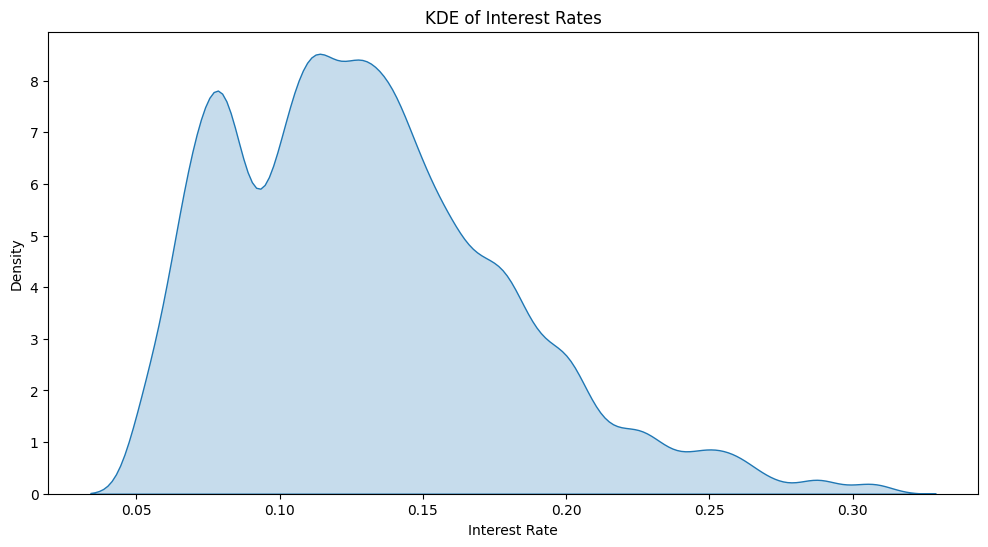

In [57]:
# Plot the KDE of 'int_rate'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_emptitle_imputed, x='int_rate', fill=True)
plt.title('KDE of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.show()

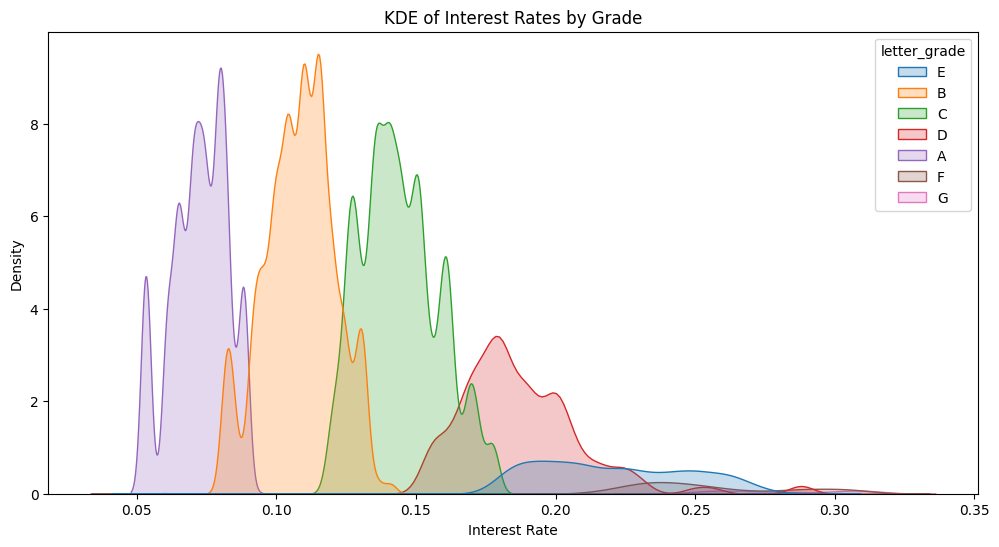

In [58]:
# Plot the KDE of 'int_rate' for each 'grade'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_emptitle_imputed, x='int_rate',
            hue='letter_grade', fill=True)
plt.title('KDE of Interest Rates by Grade')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.show()

calculate skewness

In [59]:
from scipy.stats import skew

int_rate_skewness = skew(data_emptitle_imputed['int_rate'].dropna())
print(f'Skewness of int_rate: {int_rate_skewness:.2f}')

Skewness of int_rate: 0.75


> 0.75 skewness means it is right skewed (confirmed by the visual inspection of kde plot)
> <br>
> We will impute using median

In [60]:
data_int_rate_imputed = data_emptitle_imputed.copy()

# Impute missing int_rate values with the median of the corresponding grade
data_int_rate_imputed['int_rate'] = data_int_rate_imputed.groupby(
    'grade')['int_rate'].transform(lambda x: x.fillna(x.median()))

# Display the modified DataFrame
data_int_rate_imputed['int_rate'].isnull().sum()

0

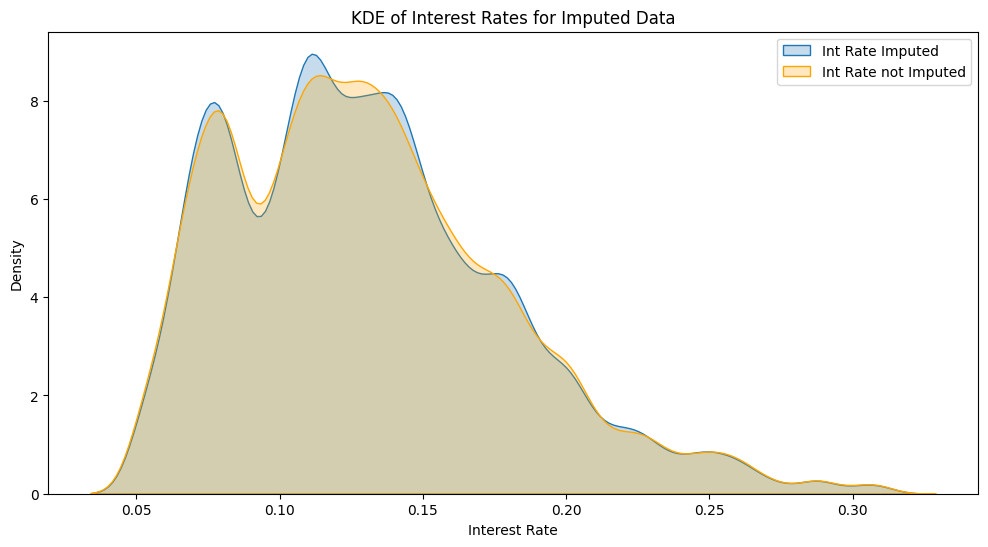

In [61]:
# Plot the KDE of 'int_rate' for the imputed fintech_df
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_int_rate_imputed, x='int_rate',
            fill=True, label='Int Rate Imputed')
sns.kdeplot(data=data_emptitle_imputed, x='int_rate', fill=True,
            label='Int Rate not Imputed', color='orange')
plt.title('KDE of Interest Rates for Imputed Data')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

Distribution didn't change after imputation

### Imputing emp_length

As shown in [relationship between emp_length and other columns](#3--eda), emp_length seems to be missing completely at random meaning we will use a univariate imputation method such as mean, median or mode imputation 
<br>
<br>
We will investigate further here to make sure it is **MCAR** before imputing


In [62]:
data_int_rate_imputed['emp_length'].value_counts()

emp_length
10+ years    8837
< 1 year     2514
2 years      2443
3 years      2148
1 year       1774
5 years      1622
4 years      1607
6 years      1184
7 years      1091
8 years      1068
9 years       868
Name: count, dtype: int64

In [63]:
null_emp_length_rows = data_int_rate_imputed[data_emptitle_imputed['emp_length'].isnull()]
null_emp_length_rows

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceDA0XHhlNlx4YWRALHFoTXhceGNkXHgxOVRceDlmXHhjNFx4ZTJceGVjZFx4ZGRceDlkXHhjYl9ceGQ0XHhjMlx4ZjBceDk2fFx4Y2ZceDkzXHgxM1x4ZGZceGZkXHhiYic=,Missing,NaN,RENT,11724.0,NaN,Verified,305xx,GA,1348.0,4043.0,21229,Current,4225.0,GA,4225.0,36 months,0.14080,15,17 June 2017,False,INDIVIDUAL,debt_consolidation,Debt consolidation,NaN,C,2,2017-06-17,Georgia
YidceDg4XHgxNFx4MDhceDExXHgwM1x4ZGNceGYyJCB6XHhmMF9XXHhiNiFceGRkXHhkZFx4ODhceDBjRlRoXHgxY3dceDgxXHhmY1x4Y2VceGJiXHhhME5zXHg4OCc=,Missing,NaN,RENT,37000.0,NaN,Verified,787xx,TX,2962.0,17770.0,160052,Charged Off,15475.0,TX,15475.0,60 months,0.21980,23,15 January 2015,False,INDIVIDUAL,credit_card,Credit card refinancing,NaN,E,4,2015-01-15,Texas
YidceGE2XHhhM3RjXHhjZEtceGQ5XHg5Ylx4ZjJceGQwUFx4MWZceDEyXHg3Zlx4ZGRceDg3Mlx4YWNiLVx4OGRceDBlXHgwOEFceDAwXHhmY1x4Y2VWZ1x4ZWJceGY5XHhmOSc=,Missing,NaN,MORTGAGE,57696.0,NaN,Verified,750xx,TX,4152.0,99648.0,80846,Fully Paid,9750.0,TX,9750.0,36 months,0.09170,7,15 October 2015,False,INDIVIDUAL,credit_card,Credit card refinancing,NaN,B,1,2015-10-15,Texas
YidceDEyXHhmM1x4YjZcJ0BKXHhmOFx4OTJceGNmXHhjN3dceGM0OVx4MDg0aVx4ZjQiaVx4YzNuXHhkNDJceGYwXHhkNkcyUkNceDliXHhmYVx4OGUn,Missing,NaN,MORTGAGE,42000.0,NaN,Verified,800xx,CO,7864.0,180871.0,169709,Charged Off,16100.0,CO,16100.0,36 months,0.16990,16,14 July 2014,False,INDIVIDUAL,credit_card,Credit card refinancing,NaN,D,3,2014-07-14,Colorado
Yic1XHgxZlx4ZmZ5XHhkNlx4ZWNceDEzXHhkOVx4ZWRceGNmXHhlMVx4OGNhXHhlNVx4ZDlceDA1Mlx4ZjFceDFjX1x4YTVceDkwOSRceGZjXHg4N1x4ZThceDhkOitceGQxXHhhOSc=,Missing,NaN,RENT,16000.0,NaN,Verified,111xx,NY,806.0,6449.0,10180,Charged Off,3000.0,NY,3000.0,36 months,0.10990,6,15 December 2015,False,INDIVIDUAL,debt_consolidation,Debt consolidation,NaN,B,1,2015-12-15,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGQ2XHg5ZkBzXHhjZVx4YzA4XHhjNkBceGU0XHhiOGUzXHhkZlx4YWRPXHhmM1x4MWVLclx4YWNceGJjTVx4N2ZtXHgxNFx4MTVtXHg5MkxceGI3XHgxZic=,Missing,NaN,MORTGAGE,60000.0,142000.0,Source Verified,810xx,CO,15274.0,198564.0,98636,Current,10000.0,CO,10000.0,36 months,0.19030,20,17 November 2017,False,JOINT,moving,Moving and relocation,NaN,D,3,2017-11-17,Colorado
YidfXHhjY1dceGNhXHhjNlx4OTBceGI5XHgxYzspI1x4MThceGVhXHhlZFx4MDZceGIyXHg4OFx4ZDNqLlx4ODFoXHg5OVx4Y2VceGM3dVx4YzZceGEwXHhmZFx4OTNBXHhkYyc=,Missing,NaN,RENT,20760.0,NaN,Verified,101xx,NY,1802.0,10811.0,12002,Current,3000.0,NY,3000.0,36 months,0.18245,20,16 October 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,NaN,D,3,2016-10-16,New York
YidceDE3Ml5ceGM5XHhkZVx4MDMuX1x4ZmZUInVeXHhkZlx4OWVceDA2XHg5Nlx4ZmVIXHhmOVx4YTBceGI1XHgwZlx4N2ZceGEwOF5ceDgyXHhlN1x4MDNceDE4XHgxNic=,Missing,NaN,MORTGAGE,53956.0,138795.0,Verified,453xx,OH,47919.0,575031.0,200376,Current,20000.0,OH,20000.0,60 months,0.16910,11,18 September 2018,False,JOINT,home_improvement,Home improvement,NaN,C,2,2018-09-18,Ohio


In [64]:
def mode_with_count(series):
    mode_value = series.mode()[0]
    mode_count = (series == mode_value).sum()
    total_count = len(series)
    percentage = (mode_count / total_count) * 100
    return f"{mode_value} ({mode_count}, {percentage:.2f}%)"

In [65]:
# Filter the DataFrame to include only object columns
object_columns = data_int_rate_imputed.select_dtypes(include=['object'])

# Group by 'emp_length_encoded' and apply the mode_with_count function
grouped_mode = object_columns.groupby(
    data_int_rate_imputed['emp_length_encoded']).agg(lambda x: mode_with_count(x))

# Calculate the mode for each object column in the main dataset
modes = object_columns.agg(lambda x: mode_with_count(x))

# Create a DataFrame for the total row
total_row = pd.DataFrame(modes).T
total_row.index = ['Total']

# Append the total row to the grouped_mode DataFrame
grouped_mode = pd.concat([total_row, grouped_mode], ignore_index=False)

grouped_mode

,emp_title,emp_length,home_ownership,verification_status,zip_code,addr_state,loan_status,state,term,issue_date,type,purpose,description,letter_grade,state_name
Total,"Missing (2365, 8.75%)","10+ years (8837, 32.69%)","MORTGAGE (13256, 49.04%)","Source Verified (10686, 39.53%)","112xx (291, 1.08%)","CA (3742, 13.84%)","Current (17065, 63.13%)","CA (3742, 13.84%)","36 months (18940, 70.07%)","16 March 2016 (654, 2.42%)","INDIVIDUAL (25079, 92.78%)","debt_consolidation (15130, 55.97%)","Debt consolidation (14268, 52.79%)","B (7834, 28.98%)","California (3742, 13.84%)"
0.0,"Missing (404, 16.07%)","< 1 year (2514, 100.00%)","RENT (1291, 51.35%)","Source Verified (1083, 43.08%)","112xx (36, 1.43%)","CA (401, 15.95%)","Current (1649, 65.59%)","CA (401, 15.95%)","36 months (1846, 73.43%)","18 October 2018 (62, 2.47%)","INDIVIDUAL (2214, 88.07%)","debt_consolidation (1406, 55.93%)","Debt consolidation (1338, 53.22%)","B (704, 28.00%)","California (401, 15.95%)"
1.0,"Manager (24, 1.35%)","1 year (1774, 100.00%)","RENT (939, 52.93%)","Source Verified (819, 46.17%)","750xx (27, 1.52%)","CA (226, 12.74%)","Current (1147, 64.66%)","CA (226, 12.74%)","36 months (1304, 73.51%)","16 March 2016 (45, 2.54%)","INDIVIDUAL (1676, 94.48%)","debt_consolidation (985, 55.52%)","Debt consolidation (939, 52.93%)","B (527, 29.71%)","California (226, 12.74%)"
2.0,"Manager (30, 1.23%)","2 years (2443, 100.00%)","RENT (1180, 48.30%)","Source Verified (1047, 42.86%)","112xx (36, 1.47%)","CA (343, 14.04%)","Current (1546, 63.28%)","CA (343, 14.04%)","36 months (1781, 72.90%)","16 March 2016 (59, 2.42%)","INDIVIDUAL (2273, 93.04%)","debt_consolidation (1396, 57.14%)","Debt consolidation (1311, 53.66%)","B (727, 29.76%)","California (343, 14.04%)"
3.0,"Manager (38, 1.77%)","3 years (2148, 100.00%)","RENT (1031, 48.00%)","Source Verified (868, 40.41%)","900xx (31, 1.44%)","CA (312, 14.53%)","Current (1341, 62.43%)","CA (312, 14.53%)","36 months (1501, 69.88%)","16 March 2016 (47, 2.19%)","INDIVIDUAL (2004, 93.30%)","debt_consolidation (1150, 53.54%)","Debt consolidation (1090, 50.74%)","B (629, 29.28%)","California (312, 14.53%)"
4.0,"Manager (29, 1.80%)","4 years (1607, 100.00%)","RENT (752, 46.80%)","Source Verified (676, 42.07%)","112xx (19, 1.18%)","CA (206, 12.82%)","Current (1033, 64.28%)","CA (206, 12.82%)","36 months (1114, 69.32%)","16 March 2016 (38, 2.36%)","INDIVIDUAL (1500, 93.34%)","debt_consolidation (900, 56.00%)","Debt consolidation (870, 54.14%)","B (453, 28.19%)","California (206, 12.82%)"
5.0,"Manager (28, 1.73%)","5 years (1622, 100.00%)","MORTGAGE (747, 46.05%)","Source Verified (657, 40.51%)","750xx (24, 1.48%)","CA (223, 13.75%)","Current (1036, 63.87%)","CA (223, 13.75%)","36 months (1139, 70.22%)","19 May 2019 (39, 2.40%)","INDIVIDUAL (1512, 93.22%)","debt_consolidation (896, 55.24%)","Debt consolidation (838, 51.66%)","C (454, 27.99%)","California (223, 13.75%)"
6.0,"Manager (32, 2.70%)","6 years (1184, 100.00%)","MORTGAGE (573, 48.40%)","Source Verified (492, 41.55%)","104xx (15, 1.27%)","CA (172, 14.53%)","Current (734, 61.99%)","CA (172, 14.53%)","36 months (841, 71.03%)","15 December 2015 (28, 2.36%)","INDIVIDUAL (1123, 94.85%)","debt_consolidation (669, 56.50%)","Debt consolidation (619, 52.28%)","C (342, 28.89%)","California (172, 14.53%)"
7.0,"Manager (22, 2.02%)","7 years (1091, 100.00%)","MORTGAGE (566, 51.88%)","Source Verified (408, 37.40%)","331xx (15, 1.37%)","CA (130, 11.92%)","Current (598, 54.81%)","CA (130, 11.92%)","36 months (764, 70.03%)","16 March 2016 (24, 2.20%)","INDIVIDUAL (1039, 95.23%)","debt_consolidation (616, 56.46%)","Debt consolidation (561, 51.42%)","B (308, 28.23%)","California (130, 11.92%)"
8.0,"Manager (23, 2.15%)","8 years (1068, 100.00%)","MORTGAGE (562, 52.62%)","Source Verified (444, 41.57%)","330xx (16, 1.50%)","CA (146, 13.67%)","Current (601, 56.27%)","CA (146, 13.67%)","36 months (738, 69.10%)","16 March 2016 (37, 3.46%)","INDIVIDUAL (1010, 94.57%)","debt_consolidation (623, 58.33%)","Debt co

> 16% of <1 years emp_length have no emp_title, implying that they are still unemployed
> <br>
> Almost half of everyone between *0 and 4 years* of employment are **renting**
> <br> 
> while
> <br>
> half of everyone between *5 and 10+ years* of employment are **mortgaging**  

> It seems to be **MNAR** as evident by what was said in the imputing emp title section where people with missing emp length are also more likely to have missing emp title which means they are probably unemployed and it would probably be safe to impute it with < 1 years


Using the < 1 years to impute emp_length

In [66]:
data_emplength_imputed = data_int_rate_imputed.copy()

In [67]:
imputationCol = 'emp_length'
OriginalVal = np.NaN
imputationVal = '< 1 year'
# Add the 'emp_title' column with original NaN and imputed 'Missing' to the LookupTable
lookup_update = pd.DataFrame({
    'column': [imputationCol],
    'original': [OriginalVal],
    'imputed': [imputationVal]
})

LookupTable = pd.concat([LookupTable, lookup_update], ignore_index=True)
LookupTable

,column,original,imputed
0,emp_length,< 1 year,0.0
1,emp_length,1 year,1.0
2,emp_length,2 years,2.0
3,emp_length,3 years,3.0
4,emp_length,4 years,4.0
5,emp_length,5 years,5.0
6,emp_length,6 years,6.0
7,emp_length,7 years,7.0
8,emp_length,8 years,8.0
9,emp_length,9 years,9.0


In [68]:
data_emplength_imputed[imputationCol] = data_emplength_imputed[imputationCol].fillna(
    imputationVal)

In [69]:
imputationCol = 'emp_length_encoded'
OriginalVal = np.NaN
imputationVal = 0
# Add the 'emp_title' column with original NaN and imputed 'Missing' to the LookupTable
lookup_update = pd.DataFrame({
    'column': [imputationCol],
    'original': [OriginalVal],
    'imputed': [imputationVal]
})

LookupTable = pd.concat([LookupTable, lookup_update], ignore_index=True)
LookupTable

,column,original,imputed
0,emp_length,< 1 year,0.0
1,emp_length,1 year,1.0
2,emp_length,2 years,2.0
3,emp_length,3 years,3.0
4,emp_length,4 years,4.0
5,emp_length,5 years,5.0
6,emp_length,6 years,6.0
7,emp_length,7 years,7.0
8,emp_length,8 years,8.0
9,emp_length,9 years,9.0


In [70]:
data_emplength_imputed[imputationCol] = data_emplength_imputed[imputationCol].fillna(
    imputationVal)

In [71]:
# Verify that there are no more null values
data_emplength_imputed['emp_length'].isnull().sum()

0

No more null values left

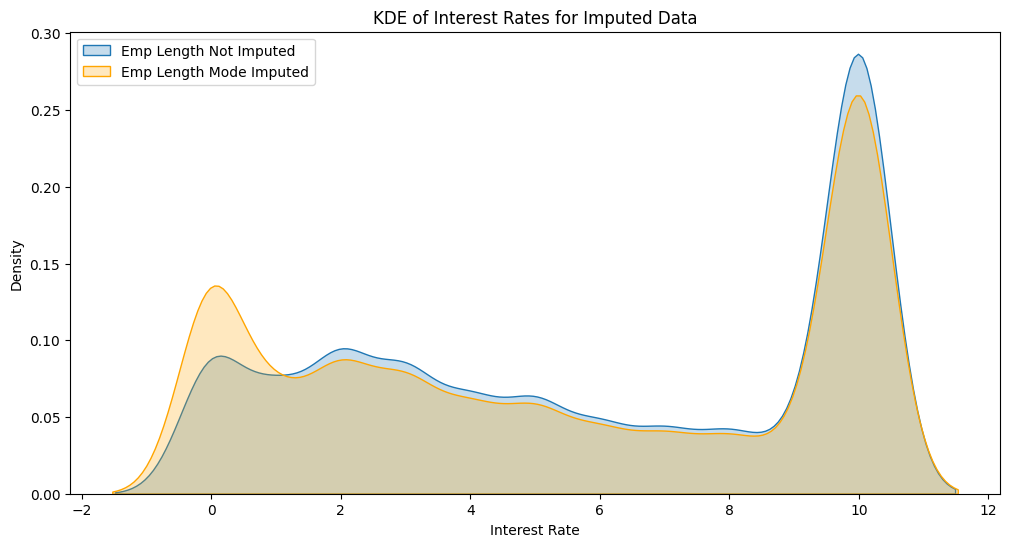

In [72]:
# Plot the KDE of 'int_rate' for the imputed fintech_df
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_int_rate_imputed, x='emp_length_encoded',
            fill=True, label='Emp Length Not Imputed')
sns.kdeplot(data=data_emplength_imputed, x='emp_length_encoded', fill=True,
            label='Emp Length Mode Imputed', color='orange')

plt.title('KDE of Interest Rates for Imputed Data')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

Distribution now has a higher peak near 0 which I believe is more correct as most unemployed people did not respond to the emp length section

### Imputing Annual Income Joint

Most of Annual Inc Joint is missing (hypothesis is that it is missing in individual and direct pay applications) <br>
Confirm this by checking if there are any missing values in joint applications

In [73]:
data_emplength_imputed[data_emplength_imputed['type'] !=
                   'JOINT'].isnull().sum().sort_values(ascending=False)

annual_inc_joint       25112
emp_title                  0
term                       0
issue_date_datetime        0
grade_encoded              0
letter_grade               0
emp_length_encoded         0
description                0
purpose                    0
type                       0
pymnt_plan                 0
issue_date                 0
grade                      0
int_rate                   0
funded_amount              0
emp_length                 0
state                      0
loan_amount                0
loan_status                0
loan_id                    0
tot_cur_bal                0
avg_cur_bal                0
addr_state                 0
zip_code                   0
verification_status        0
annual_inc                 0
home_ownership             0
state_name                 0
dtype: int64

>Missing values in annual_inc_joint are only present in individual and Direct Pay applications so it is safe to assume that the missing values are due to the type of application meaning annual inc joint is **MNAR** <br>
>This means we can probably impute the missing values with the Annual Income of the individual after handling the outliers in Annual Income 
> <br>
> 

In [74]:
data_income_imputed = data_emplength_imputed.copy()
data_income_imputed['annual_inc_joint'] = data_income_imputed['annual_inc_joint'].fillna(
    data_income_imputed['annual_inc'])
data_income_imputed

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,10+ years,OWN,70000.0,70000.0,Not Verified,461xx,IN,8529.0,196163.0,213592,Charged Off,23525.0,IN,23525.0,60 months,0.1825,23,15 October 2015,False,INDIVIDUAL,credit_card,Credit card refinancing,10.0,E,4,2015-10-15,Indiana
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,3 years,RENT,80000.0,80000.0,Source Verified,917xx,CA,2890.0,17337.0,90990,Current,10000.0,CA,10000.0,36 months,0.1102,6,19 August 2019,False,INDIVIDUAL,medical,Medical expenses,3.0,B,1,2019-08-19,California
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,7 years,RENT,80000.0,80000.0,Source Verified,840xx,UT,5099.0,101978.0,171258,Fully Paid,16800.0,UT,16800.0,36 months,0.1153,10,15 June 2015,False,INDIVIDUAL,debt_consolidation,Debt consolidation,7.0,B,1,2015-06-15,Utah
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,4 years,MORTGAGE,65000.0,65000.0,Not Verified,783xx,TX,27686.0,359917.0,108300,Current,10800.0,TX,10800.0,36 months,0.1446,15,16 May 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,4.0,C,2,2016-05-16,Texas
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,< 1 year,RENT,60500.0,60500.0,Source Verified,021xx,MA,4155.0,41553.0,47169,Current,6025.0,MA,6025.0,36 months,0.1430,15,19 June 2019,False,INDIVIDUAL,vacation,Vacation,0.0,C,2,2019-06-19,Massachusetts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,Unit Mgr/ER,10+ years,RENT,70000.0,70000.0,Not Verified,926xx,CA,4784.0,62198.0,179824,Fully Paid,18000.0,CA,18000.0,60 months,0.1199,14,16 February 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,10.0,C,2,2016-02-16,California
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,Product Engineer,2 years,MORTGAGE,112000.0,112000.0,Not Verified,014xx,MA,42001.0,210007.0,3790,Current,2000.0,MA,2000.0,36 months,0.0735,4,18 February 2018,False,INDIVIDUAL,credit_card,Credit card refinancing,2.0,A,0,2018-02-18,Massachusetts
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,Officer,10+ years,MORTGAGE,80000.0,140000.0,Not Verified,774xx,TX,4412.0,92647.0,234988,Current,28000.0,TX,28000.0,36 months,0.0667,5,18 October 2018,False,JOINT,credit_card,Credit card refinancing,10.0,A,0,2018-10-18,Texas


In [75]:
data_income_imputed['annual_inc_joint'].isnull().sum()

0

In [76]:
data_income_imputed

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,10+ years,OWN,70000.0,70000.0,Not Verified,461xx,IN,8529.0,196163.0,213592,Charged Off,23525.0,IN,23525.0,60 months,0.1825,23,15 October 2015,False,INDIVIDUAL,credit_card,Credit card refinancing,10.0,E,4,2015-10-15,Indiana
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,3 years,RENT,80000.0,80000.0,Source Verified,917xx,CA,2890.0,17337.0,90990,Current,10000.0,CA,10000.0,36 months,0.1102,6,19 August 2019,False,INDIVIDUAL,medical,Medical expenses,3.0,B,1,2019-08-19,California
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,7 years,RENT,80000.0,80000.0,Source Verified,840xx,UT,5099.0,101978.0,171258,Fully Paid,16800.0,UT,16800.0,36 months,0.1153,10,15 June 2015,False,INDIVIDUAL,debt_consolidation,Debt consolidation,7.0,B,1,2015-06-15,Utah
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,4 years,MORTGAGE,65000.0,65000.0,Not Verified,783xx,TX,27686.0,359917.0,108300,Current,10800.0,TX,10800.0,36 months,0.1446,15,16 May 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,4.0,C,2,2016-05-16,Texas
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,< 1 year,RENT,60500.0,60500.0,Source Verified,021xx,MA,4155.0,41553.0,47169,Current,6025.0,MA,6025.0,36 months,0.1430,15,19 June 2019,False,INDIVIDUAL,vacation,Vacation,0.0,C,2,2019-06-19,Massachusetts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,Unit Mgr/ER,10+ years,RENT,70000.0,70000.0,Not Verified,926xx,CA,4784.0,62198.0,179824,Fully Paid,18000.0,CA,18000.0,60 months,0.1199,14,16 February 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,10.0,C,2,2016-02-16,California
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,Product Engineer,2 years,MORTGAGE,112000.0,112000.0,Not Verified,014xx,MA,42001.0,210007.0,3790,Current,2000.0,MA,2000.0,36 months,0.0735,4,18 February 2018,False,INDIVIDUAL,credit_card,Credit card refinancing,2.0,A,0,2018-02-18,Massachusetts
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,Officer,10+ years,MORTGAGE,80000.0,140000.0,Not Verified,774xx,TX,4412.0,92647.0,234988,Current,28000.0,TX,28000.0,36 months,0.0667,5,18 October 2018,False,JOINT,credit_card,Credit card refinancing,10.0,A,0,2018-10-18,Texas


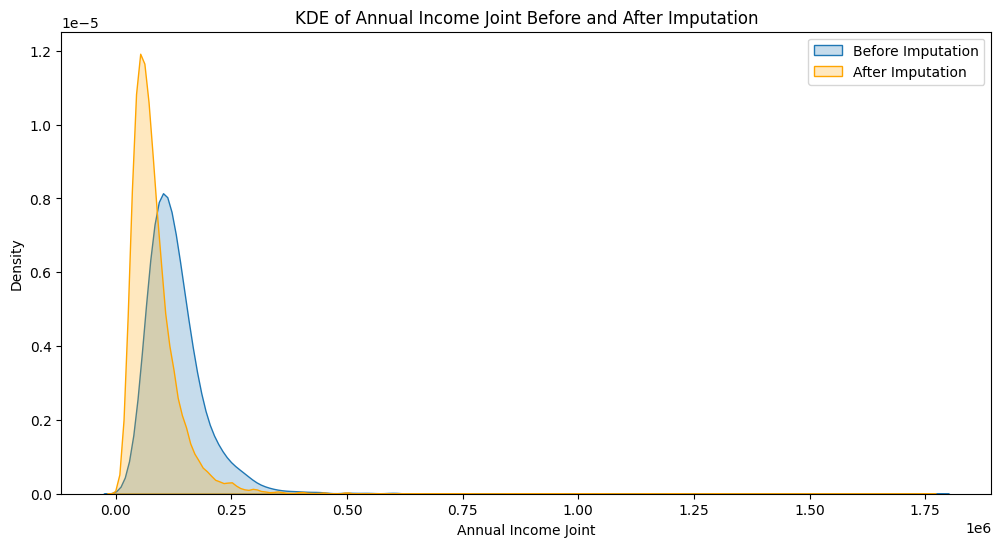

In [77]:
# Plot the KDE of 'annual_inc_joint' before and after imputation
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_emplength_imputed, x='annual_inc_joint', fill=True, label='Before Imputation')
sns.kdeplot(data=data_income_imputed, x='annual_inc_joint',
            fill=True, label='After Imputation', color='orange')
plt.title('KDE of Annual Income Joint Before and After Imputation')
plt.xlabel('Annual Income Joint')
plt.ylabel('Density')
plt.legend()
plt.show()

Distribution moved back as average annual income for individual people is less than joint income so when we move that into annual income join the peak will receed

### Checking if any other columns still have nulls

In [78]:
null_counts = data_income_imputed.isnull().sum()
null_percent = data_income_imputed.isnull().mean() * 100

pd.DataFrame({
    'null_values': null_counts,
    'null_percent': null_percent
})[null_counts > 0].sort_values(by='null_values', ascending=False)

,null_values,null_percent


In [79]:
# saving all the null handling back into the original df
fintech_df = data_income_imputed.copy()
fintech_df

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,10+ years,OWN,70000.0,70000.0,Not Verified,461xx,IN,8529.0,196163.0,213592,Charged Off,23525.0,IN,23525.0,60 months,0.1825,23,15 October 2015,False,INDIVIDUAL,credit_card,Credit card refinancing,10.0,E,4,2015-10-15,Indiana
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,3 years,RENT,80000.0,80000.0,Source Verified,917xx,CA,2890.0,17337.0,90990,Current,10000.0,CA,10000.0,36 months,0.1102,6,19 August 2019,False,INDIVIDUAL,medical,Medical expenses,3.0,B,1,2019-08-19,California
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,7 years,RENT,80000.0,80000.0,Source Verified,840xx,UT,5099.0,101978.0,171258,Fully Paid,16800.0,UT,16800.0,36 months,0.1153,10,15 June 2015,False,INDIVIDUAL,debt_consolidation,Debt consolidation,7.0,B,1,2015-06-15,Utah
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,4 years,MORTGAGE,65000.0,65000.0,Not Verified,783xx,TX,27686.0,359917.0,108300,Current,10800.0,TX,10800.0,36 months,0.1446,15,16 May 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,4.0,C,2,2016-05-16,Texas
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,< 1 year,RENT,60500.0,60500.0,Source Verified,021xx,MA,4155.0,41553.0,47169,Current,6025.0,MA,6025.0,36 months,0.1430,15,19 June 2019,False,INDIVIDUAL,vacation,Vacation,0.0,C,2,2019-06-19,Massachusetts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,Unit Mgr/ER,10+ years,RENT,70000.0,70000.0,Not Verified,926xx,CA,4784.0,62198.0,179824,Fully Paid,18000.0,CA,18000.0,60 months,0.1199,14,16 February 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,10.0,C,2,2016-02-16,California
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,Product Engineer,2 years,MORTGAGE,112000.0,112000.0,Not Verified,014xx,MA,42001.0,210007.0,3790,Current,2000.0,MA,2000.0,36 months,0.0735,4,18 February 2018,False,INDIVIDUAL,credit_card,Credit card refinancing,2.0,A,0,2018-02-18,Massachusetts
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,Officer,10+ years,MORTGAGE,80000.0,140000.0,Not Verified,774xx,TX,4412.0,92647.0,234988,Current,28000.0,TX,28000.0,36 months,0.0667,5,18 October 2018,False,JOINT,credit_card,Credit card refinancing,10.0,A,0,2018-10-18,Texas


## Observing and Handling inconsistent data

In [80]:
# List of categorical columns
categorical_columns = ['home_ownership', 'verification_status', 'loan_status', 'term','type']

# Check unique values for each categorical column
for column in categorical_columns:
    unique_values = fintech_df[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print("\n")

Unique values for home_ownership:
['OWN' 'RENT' 'MORTGAGE' 'ANY' 'OTHER']


Unique values for verification_status:
['Not Verified' 'Source Verified' 'Verified']


Unique values for loan_status:
['Charged Off' 'Current' 'Fully Paid' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default']


Unique values for term:
[' 60 months' ' 36 months']


Unique values for type:
['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']




> Term values have an extra space at the beginning that we should remove

In [81]:
# stripping term column
fintech_df['term'] = fintech_df['term'].str.strip()
fintech_df['term'].unique()

array(['60 months', '36 months'], dtype=object)

In [82]:
# Check for duplicate rows
duplicate_rows = fintech_df[fintech_df.duplicated()]

# Display the duplicate rows
duplicate_rows

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,


> There are no odd unique values and no duplicate rows

check if there's any fintech_df that doesnt make sense such as annual income joint being less than annual income

In [83]:
# Filter the DataFrame to find rows where annual_inc_joint is less than annual_inc
invalid_income_rows = fintech_df[fintech_df['annual_inc_joint'] < fintech_df['annual_inc']]

# Display the rows
invalid_income_rows

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,


> no remaining inconsistent categorical values

## Adding Installment per Month column

> adding this here because if we add after outlier handling it will be affected by log transform

In [84]:
def calculate_monthly_installments(row):
    principal = row['loan_amount']
    annual_rate = row['int_rate']
    term_months = int(row['term'].split()[0])
    
    monthly_rate = annual_rate / 12
    numerator = principal * monthly_rate * ((1 + monthly_rate) ** term_months)
    denominator = ((1 + monthly_rate) ** term_months) - 1
    return numerator / denominator if denominator != 0 else 0


In [85]:

fintech_df['installment_per_month'] = fintech_df.apply(calculate_monthly_installments, axis=1)
fintech_df[['int_rate','term','loan_amount','installment_per_month']]

,int_rate,term,loan_amount,installment_per_month
customer_id,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,0.1825,60 months,23525.0,600.584376
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,0.1102,36 months,10000.0,327.481892
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,0.1153,36 months,16800.0,554.236638
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,0.1446,36 months,10800.0,371.535905
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,0.1430,36 months,6025.0,206.799195
...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,0.1199,60 months,18000.0,400.309104
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,0.0735,36 months,2000.0,62.074748
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,0.0667,36 months,28000.0,860.340306


## EDA 2.0, Questions to answer

### 1 - Does the relationship between annual income being less than the loan amount influence late loan payments, and how does this relationship vary by state and loan grade?

In [86]:
temp_df = fintech_df.copy()
# Create a new column for income being less than loan amount
temp_df['Income < Loan Amount'] = temp_df['annual_inc'] < temp_df['loan_amount']

# Create a new column 'Late' based on loan statuses that indicate a late payment
late_statuses = ['Late (31-120 days)', 'Late (16-30 days)', 'Charged Off', 'In Grace Period']
temp_df['late'] = temp_df['loan_status'].isin(late_statuses)

# Filter for late loans
late_loans = temp_df[temp_df['late']]

print("total late loans: ", late_loans.shape[0])

print("late loans with income less than amount: ",late_loans[late_loans['Income < Loan Amount']].shape[0])

total late loans:  2280
late loans with income less than amount:  10


In [87]:
# Group by state and loan grade, and calculate the percentage of late loans
grouped = late_loans.groupby(
    ['state', 'letter_grade', 'Income < Loan Amount']).size().unstack(fill_value=0)
total_loans = temp_df.groupby(
    ['state', 'letter_grade', 'Income < Loan Amount']).size().unstack(fill_value=0)

late_loan_percent = (grouped / total_loans) * 100

late_loan_percent

Income < Loan Amount       False  True 
state letter_grade                     
AK    A                      NaN    NaN
      B                      NaN    NaN
      C                 4.545455    NaN
      D                      NaN    NaN
      E               100.000000    NaN
...                          ...    ...
WY    C                13.333333    NaN
      D                14.285714    0.0
      E                      NaN    NaN
      F                50.000000    NaN
      G                      NaN    NaN

[333 rows x 2 columns]

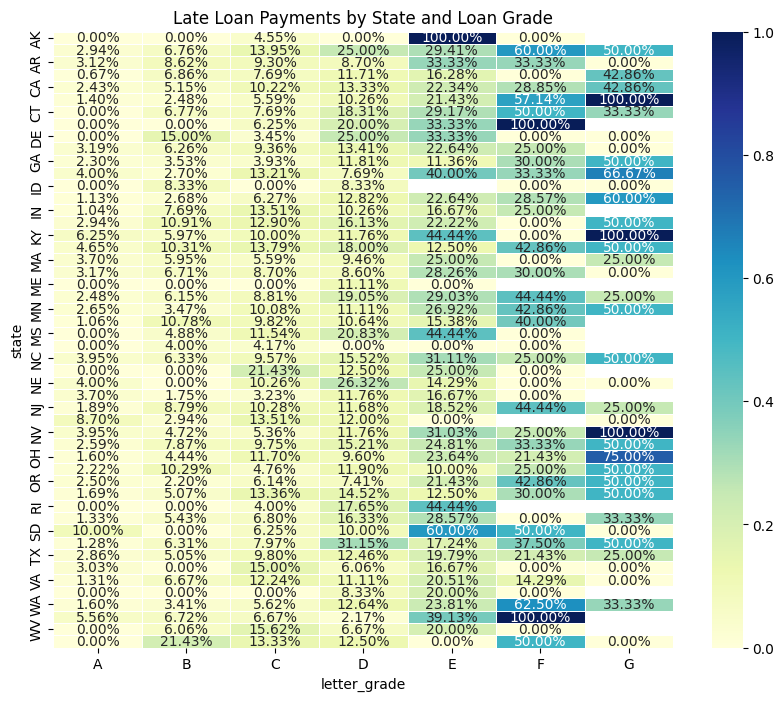

In [88]:

# Create a pivot table for visualization
pivot = temp_df.pivot_table(
    index='state', columns='letter_grade', values='late', aggfunc='mean')

# Plot heatmap of late payment percentages by state and loan grade
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".2%", linewidths=.5)
plt.title('Late Loan Payments by State and Loan Grade')
plt.show()

> there is not really a relation as inc < loan amount rows are a lot less than total late loans (10/2280) 
> <br>
> Late loan payments however seem to be correlated to higher grades and nothing much else

### 2 - How do interest rates vary between homeowners and renters, and how does this variation differ across different income brackets and loan purposes?

In [89]:
temp_df = fintech_df.copy()
# Create income brackets (5 quantiles)
temp_df['income_bracket'] = pd.qcut(temp_df['annual_inc'], 5, labels=[
                                 'Low', 'Low-Mid', 'Mid', 'Mid-High', 'High'])

# Group by home ownership, income brackets, and loan purpose
interest_rates = temp_df.groupby(['home_ownership', 'income_bracket', 'purpose'])[
    'int_rate'].mean().unstack()

interest_rates

C:\Users\shoro\AppData\Local\Temp\ipykernel_14356\1748122524.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interest_rates = temp_df.groupby(['home_ownership', 'income_bracket', 'purpose'])[


purpose                             car  credit_card  debt_consolidation  \
home_ownership income_bracket                                              
ANY            Low                  NaN     0.094900            0.177400   
               Low-Mid              NaN     0.099800            0.122386   
               Mid                  NaN     0.089933            0.127800   
               Mid-High             NaN     0.088100            0.117100   
               High                 NaN          NaN            0.092633   
MORTGAGE       Low             0.117706     0.121451            0.143742   
               Low-Mid         0.125891     0.116382            0.136292   
               Mid             0.119448     0.117751            0.134162   
               Mid-High        0.120200     0.114710            0.128855   
               High            0.107942     0.108504            0.124451   
OTHER          Low                  NaN          NaN                 NaN   
               Low-Mid              NaN          NaN                 NaN   
               Mid                  NaN          NaN                 NaN   
               Mid-High             NaN     0.121200                 NaN   
               High                 NaN          NaN                 NaN   
OWN            Low             0.128017     0.124675            0.145109   
               Low-Mid         0.143538     0.117753            0.135127   
               Mid             0.118587     0.120615            0.135292   
               Mid-High        0.097633     0.111096            0.131182   
               High            0.153040     0.107556            0.122988   
RENT           Low             0.135352     0.124243            0.145239   
               Low-Mid         0.130893     0.122616            0.139283   
               Mid             0.132458     0.115168            0.135680   
               Mid-High        0.135247     0.116561            0.134427   
               High            0.103727     0.113543            0.132147   

purpose                        home_improvement     house  major_purchase  \
home_ownership income_bracket                                               
ANY            Low                          NaN       NaN             NaN   
               Low-Mid                 0.136950  0.130800             NaN   
               Mid                          NaN  0.103300             NaN   
               Mid-High                     NaN  0.110200             NaN   
               High                         NaN       NaN             NaN   
MORTGAGE       Low                     0.122156  0.116980        0.125855   
               Low-Mid                 0.128287  0.150296        0.130677   
               Mid                     0.127968  0.117085        0.124982   
               Mid-High                0.121139  0.129223        0.130000   
               High                    0.117310  0.126631        0.104251   
OTHER          Low                          NaN       NaN             NaN   
               Low-Mid                      NaN       NaN             NaN   
               Mid                          NaN       NaN             NaN   
               Mid-High                     NaN       NaN             NaN   
               High                         NaN       NaN             NaN   
OWN            Low                     0.137570  0.163522        0.110000   
               Low-Mid                 0.134368  0.140550        0.124933   
               Mid                     0.134000  0.138220        0.096720   
               Mid-High                0.125516  0.164967        0.155967   
               High                    0.121092  0.092400        0.140621   
RENT           Low                     0.133828  0.176154        0.142489   
               Low-Mid                 0.136492  0.147983        0.145334   
               Mid                     0.111570  0.139257        0.134082   
               Mid-Hig

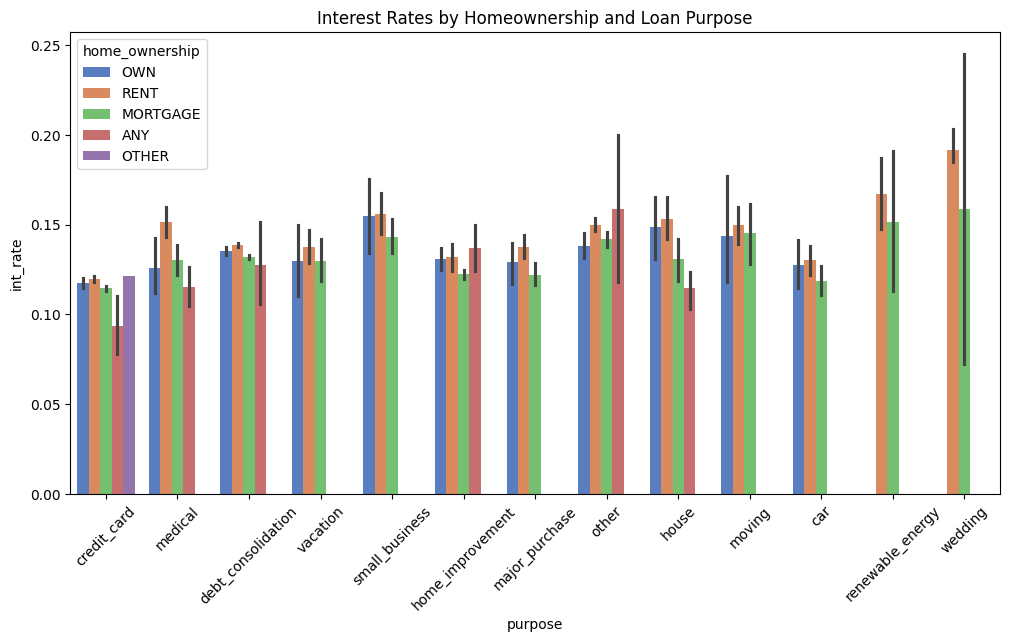

In [90]:
# Create a bar plot showing interest rates by homeownership, income bracket, and loan purpose
plt.figure(figsize=(12, 6))
sns.barplot(x='purpose', y='int_rate', hue='home_ownership',
            data=temp_df, palette='muted')
plt.title('Interest Rates by Homeownership and Loan Purpose')
plt.xticks(rotation=45)
plt.show()

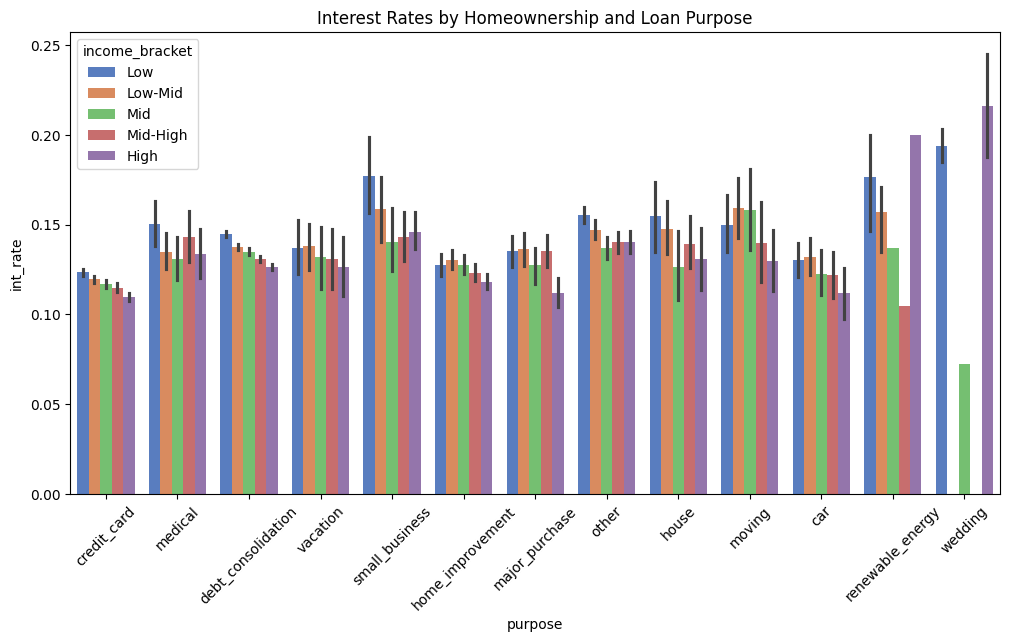

In [91]:
# Create a bar plot showing interest rates by homeownership, income bracket, and loan purpose
plt.figure(figsize=(12, 6))
sns.barplot(x='purpose', y='int_rate', hue='income_bracket',
            data=temp_df, palette='muted')
plt.title('Interest Rates by Homeownership and Loan Purpose')
plt.xticks(rotation=45)
plt.show()

> Owners, renters and mortagers pay very similar interest rates so it doesn't seem significant
> <br>
> int rate for lower income brackets seem to be consistently higher across different purposes
> <br>
> purpose itself doesnt seem to have much effect on the int rate

### 3 - Do borrowers with shorter employment lengths (e.g., less than 5 years) have higher loan amounts compared to those with longer employment lengths? How does this vary across loan grades?

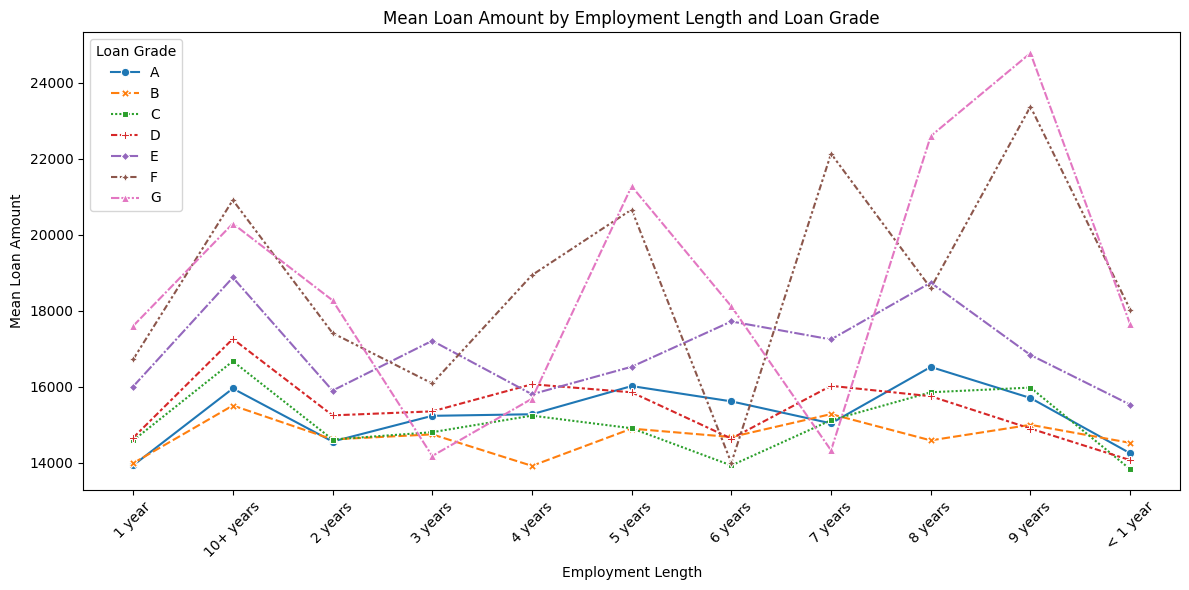

In [92]:
temp_df = fintech_df.copy()
# Calculate the mean loan amount by employment length and loan grade
loan_amount_by_emp_length = temp_df.groupby(['emp_length', 'letter_grade'])[
    'loan_amount'].mean().unstack()

# Plot the mean loan amount by employment length, with a line for each loan grade
plt.figure(figsize=(12, 6))
sns.lineplot(data=loan_amount_by_emp_length, markers=True)
plt.title('Mean Loan Amount by Employment Length and Loan Grade')
plt.xlabel('Employment Length')
plt.ylabel('Mean Loan Amount')
plt.legend(title='Loan Grade')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

> larger grades (more volatile borrowers) such as F and G exhibit higher variation in loan amounts between employment lengths while other lower grades have around the same range of loan amounts for all emp lengths meaning emp length is not very correlated with loan amounts but letter grade might be

### 4 - Does being on a payment plan impact loan status, and how does this relationship vary across different employment lengths?

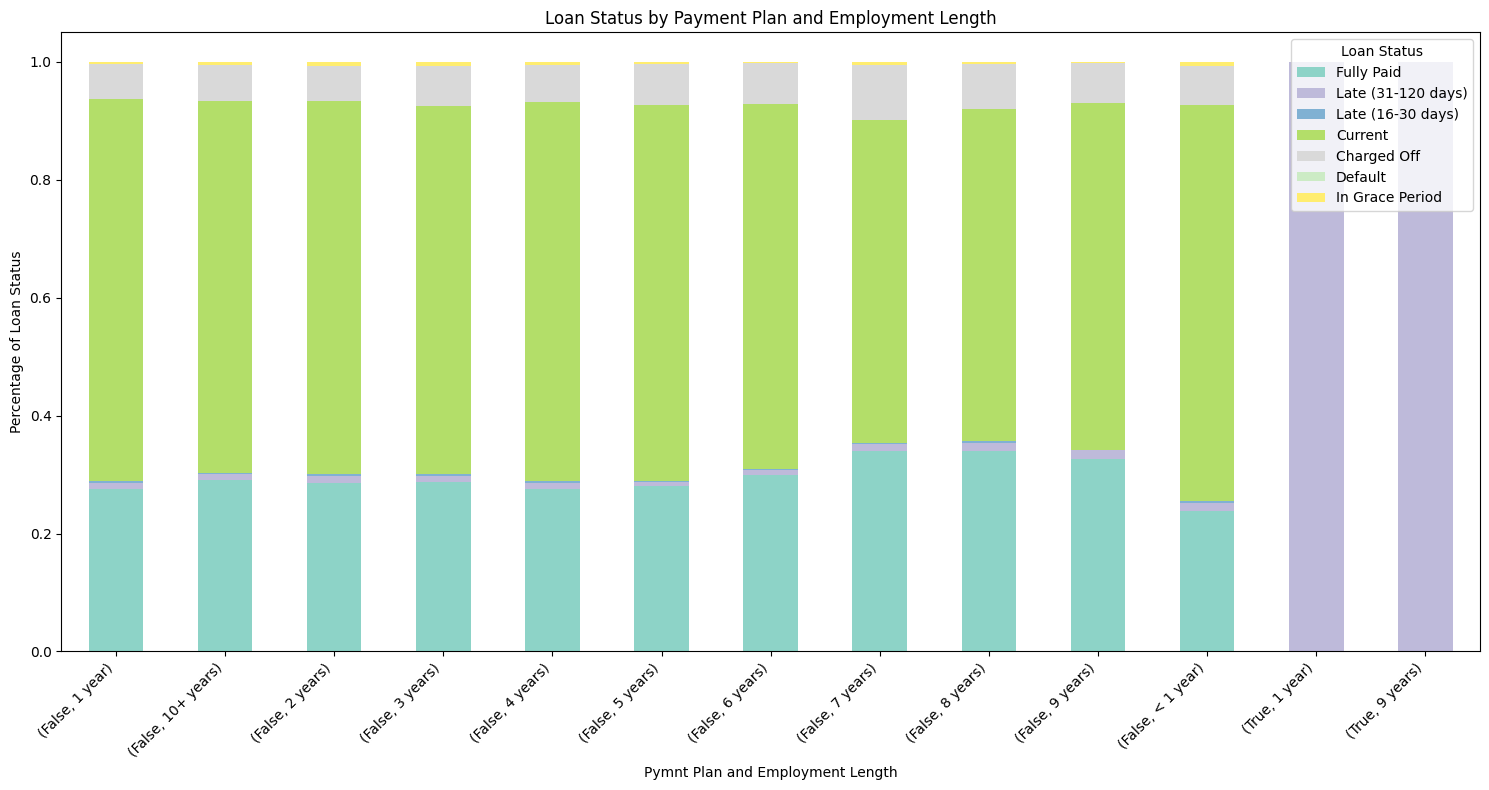

In [93]:
temp_df = fintech_df.copy()
# Group by Pymnt Plan, Emp Length, and Loan Status
pymnt_emp_status = temp_df.groupby(['pymnt_plan', 'emp_length'])[
    'loan_status'].value_counts(normalize=True).unstack()

# Select the most relevant loan statuses to focus on
pymnt_emp_status = pymnt_emp_status[[
    'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)' ,'Current', 'Charged Off', 'Default','In Grace Period']]

# Plot a stacked bar chart to visualize loan outcomes by Pymnt Plan and Emp Length
pymnt_emp_status.plot(kind='bar', stacked=True,
                      figsize=(15, 8), colormap='Set3')
plt.title('Loan Status by Payment Plan and Employment Length')
plt.xlabel('Pymnt Plan and Employment Length')
plt.ylabel('Percentage of Loan Status')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

> Being on a payment plan seems to be correlated to being (very) late on paying off loans.
> <br>
> No payment plan mostly means the loan status is current but it could also either be fully paid or charged off
> <br>
> Employment length doesnt seem to matter in this case 

### 5 - Is there a relationship between a borrower's loan grade and their current balances, and how does this relationship vary across different verification statuses?

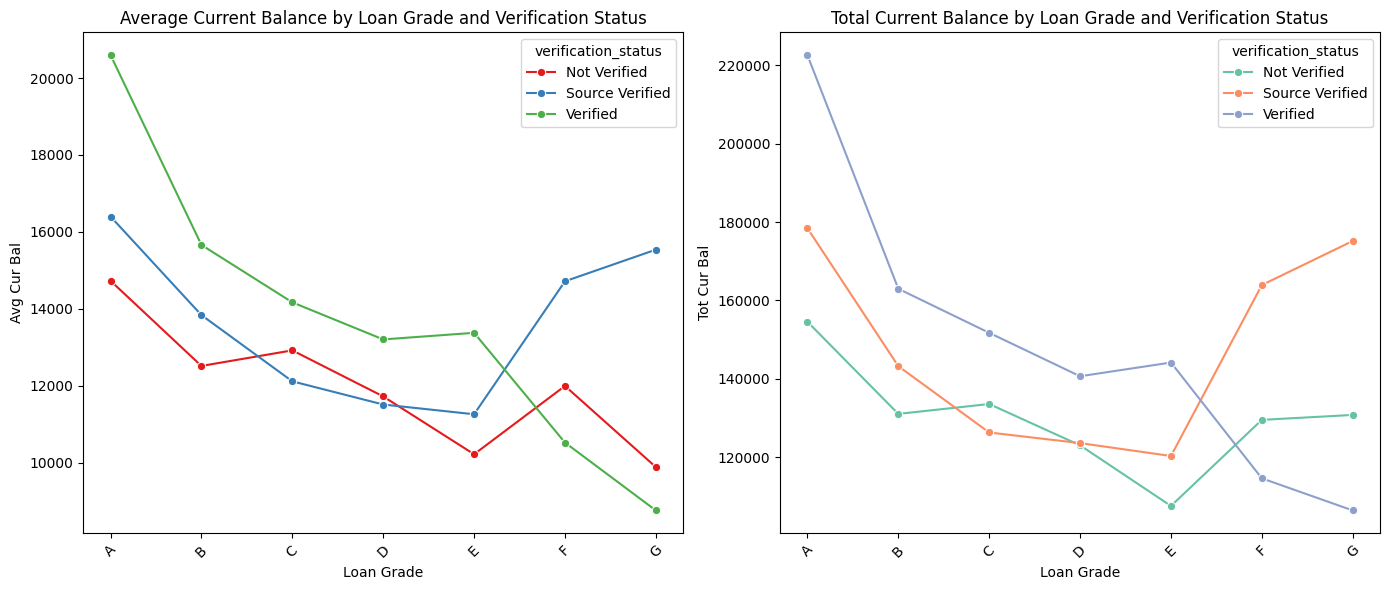

In [94]:
temp_df = fintech_df.copy()
#Calculate the mean of Avg Cur Bal and Tot Cur Bal grouped by Grade and Verification Status
cur_bal_data = temp_df.groupby(['letter_grade', 'verification_status'])[['avg_cur_bal', 'tot_cur_bal']].mean().reset_index()

# Set up the figure and subplots
plt.figure(figsize=(14, 6))

# Plot for Avg Cur Bal
plt.subplot(1, 2, 1)
sns.lineplot(x='letter_grade', y='avg_cur_bal', hue='verification_status', data=cur_bal_data, marker='o', palette='Set1')
plt.title('Average Current Balance by Loan Grade and Verification Status')
plt.xlabel('Loan Grade')
plt.ylabel('Avg Cur Bal')
plt.xticks(rotation=45)

# Plot for Tot Cur Bal
plt.subplot(1, 2, 2)
sns.lineplot(x='letter_grade', y='tot_cur_bal', hue='verification_status', data=cur_bal_data, marker='o', palette='Set2')
plt.title('Total Current Balance by Loan Grade and Verification Status')
plt.xlabel('Loan Grade')
plt.ylabel('Tot Cur Bal')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Lower Loan Grades Correlate with Higher Balances: Both average and total current balances generally increase as loan grades worsen, particularly for the lowest grades (F, G). This suggests that riskier borrowers (as indicated by lower loan grades) tend to carry more debt.

Verification Status Provides Additional Insight: Borrowers with verified statuses consistently have lower balances across the board, which could indicate better financial control or lender confidence. Non-verified borrowers with poor loan grades seem to carry the heaviest debt burden.

> As grade increases, avg and total cur balances decrease as a general trend. The trend reverses slightly for the lower grades (F and G), where balances increase again, which could indicate riskier borrowers carrying more debt.
> <br>
> There's also the trend that the amount of source verified and not veified statuses suprass verified statuses near the end grades (F and G)
> <br>
> This would mean that there's higher risk near the end grades so it's more important for banks to do source verification for these higher risk customers.

## Observing and Handling Outliers

### Plotting Box Plot for each numeric column in the dataset to observe outliers

In [95]:
def calculate_iqr_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask = (column < lower_bound) | (column > upper_bound)
    outliers = column[outliers_mask]
    outlier_percentage = len(outliers) / len(column) * 100
    return outlier_percentage

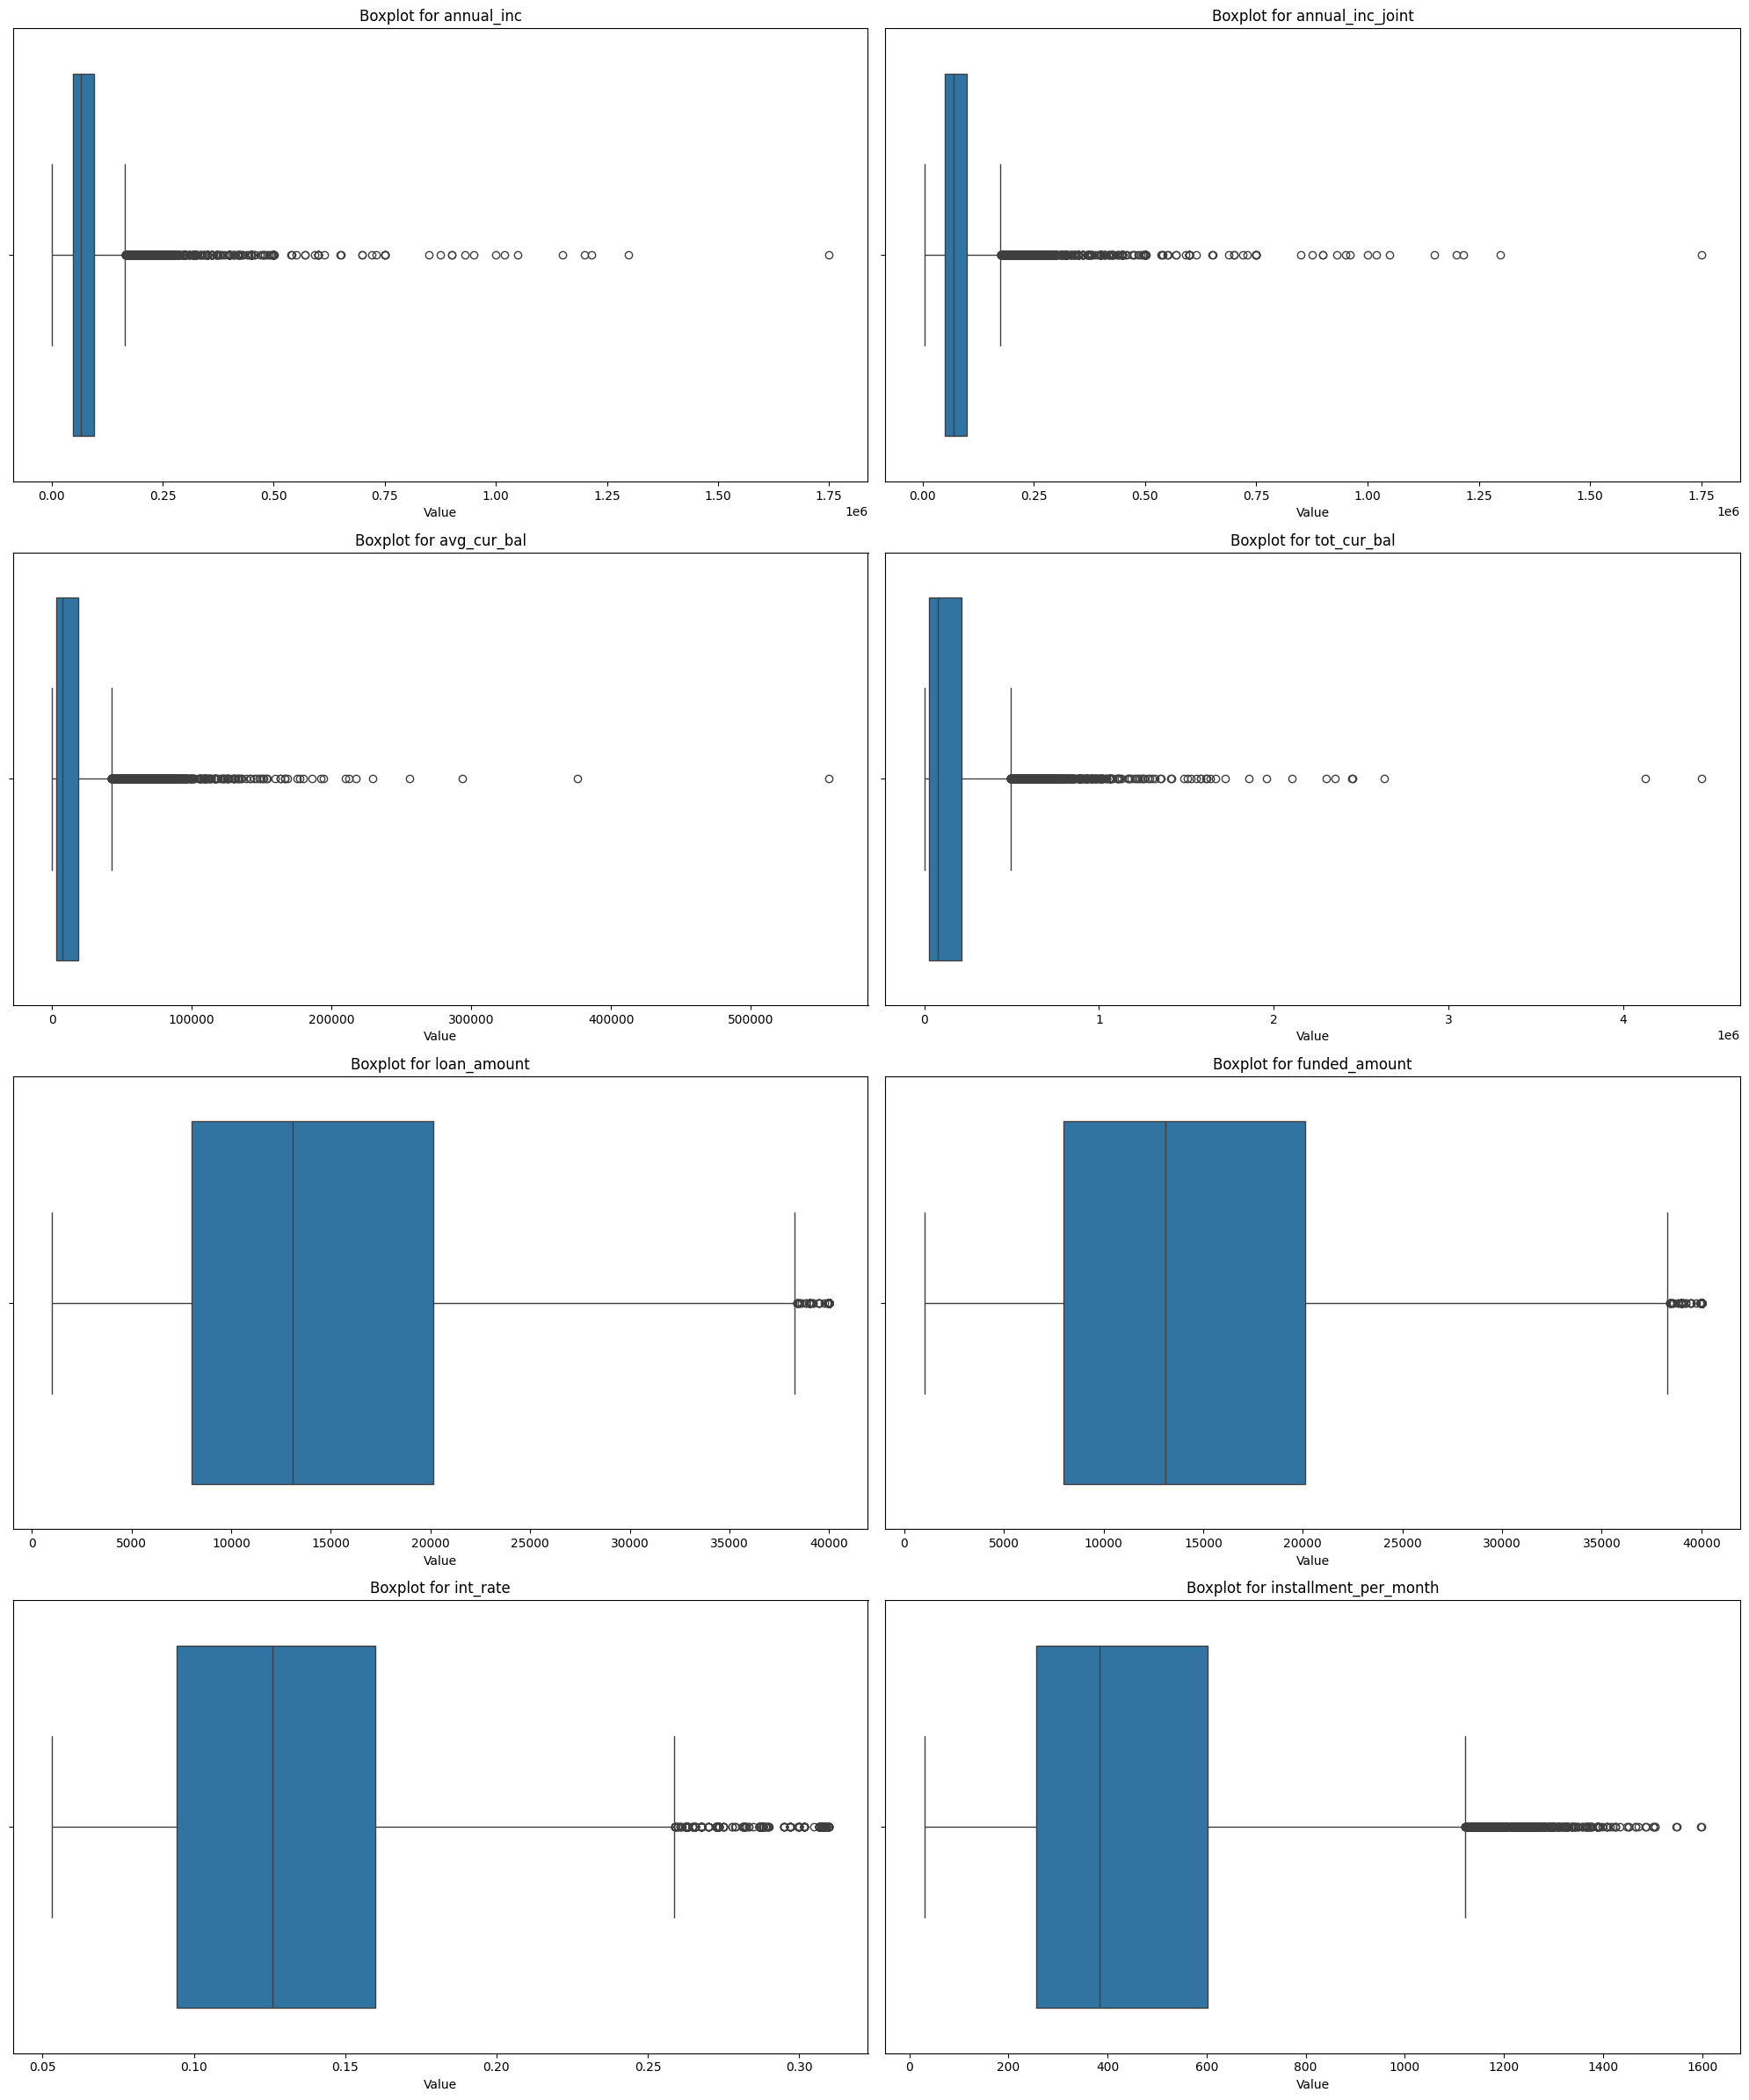

In [96]:
# Selecting only numeric columns from the DataFrame
# excluding 'grade', 'grade_encoded', 'loan_id', 'emp_length_encoded' because they are not numeric
numeric_cols = fintech_df.select_dtypes(include=['number']).drop(columns=['grade', 'grade_encoded', 'loan_id', 'emp_length_encoded']).columns

# Number of columns per row
cols_per_row = 2

# Calculate the number of rows needed
num_rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Looping through each numeric column and creating a horizontal boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=fintech_df[col], orient='h', ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel('Value')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [97]:
outlier_percentages = {col: calculate_iqr_outliers(
    fintech_df[col]) for col in numeric_cols}
for col, percentage in outlier_percentages.items():
    print(f'Percentage of Outliers in {col}: {percentage:.3f}%')

Percentage of Outliers in annual_inc: 4.998%
Percentage of Outliers in annual_inc_joint: 5.213%
Percentage of Outliers in avg_cur_bal: 5.538%
Percentage of Outliers in tot_cur_bal: 3.648%
Percentage of Outliers in loan_amount: 2.412%
Percentage of Outliers in funded_amount: 2.412%
Percentage of Outliers in int_rate: 1.439%
Percentage of Outliers in installment_per_month: 3.134%


> We notice that all numeric columns have a substantial amount of outliers. We will not use Z scores because all fintech_df is skewed according to distributions in [EDA](#3--eda)

### Attempting to handle outliers 

#### Attempting to apply log transform to get a less skewed distribution 

In [98]:
# Check for zeros in numeric columns
zero_counts = (fintech_df[numeric_cols] == 0).sum()

# Display columns with zero counts
zero_counts[zero_counts > 0]

avg_cur_bal    5
tot_cur_bal    5
dtype: int64

avg and total cur bal have 5 values which are equal to 0 so we use log1p

In [99]:
# Apply log1p transform to all numeric columns
data_log_transformed = fintech_df.copy()

for col in numeric_cols:
    data_log_transformed[col] = np.log1p(data_log_transformed[col])

# Display the transformed DataFrame
data_log_transformed.head()

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name,installment_per_month
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,10+ years,OWN,11.156265,11.156265,Not Verified,461xx,IN,9.051345,12.186706,213592,Charged Off,10.065861,IN,10.065861,60 months,0.167631,23,15 October 2015,False,INDIVIDUAL,credit_card,Credit card refinancing,10.0,E,4,2015-10-15,Indiana,6.399567
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,3 years,RENT,11.289794,11.289794,Source Verified,917xx,CA,7.969358,9.760656,90990,Current,9.210440,CA,9.210440,36 months,0.104540,6,19 August 2019,False,INDIVIDUAL,medical,Medical expenses,3.0,B,1,2019-08-19,California,5.794482
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,7 years,RENT,11.289794,11.289794,Source Verified,840xx,UT,8.536996,11.532522,171258,Fully Paid,9.729194,UT,9.729194,36 months,0.109123,10,15 June 2015,False,INDIVIDUAL,debt_consolidation,Debt consolidation,7.0,B,1,2015-06-15,Utah,6.319394
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,4 years,MORTGAGE,11.082158,11.082158,Not Verified,783xx,TX,10.228718,12.793632,108300,Current,9.287394,TX,9.287394,36 months,0.135055,15,16 May 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,4.0,C,2,2016-05-16,Texas,5.920333
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,< 1 year,RENT,11.010415,11.010415,Source Verified,021xx,MA,8.332308,10.634749,47169,Current,8.703839,MA,8.703839,36 months,0.133656,15,19 June 2019,False,INDIVIDUAL,vacation,Vacation,0.0,C,2,2019-06-19,Massachusetts,5.336572


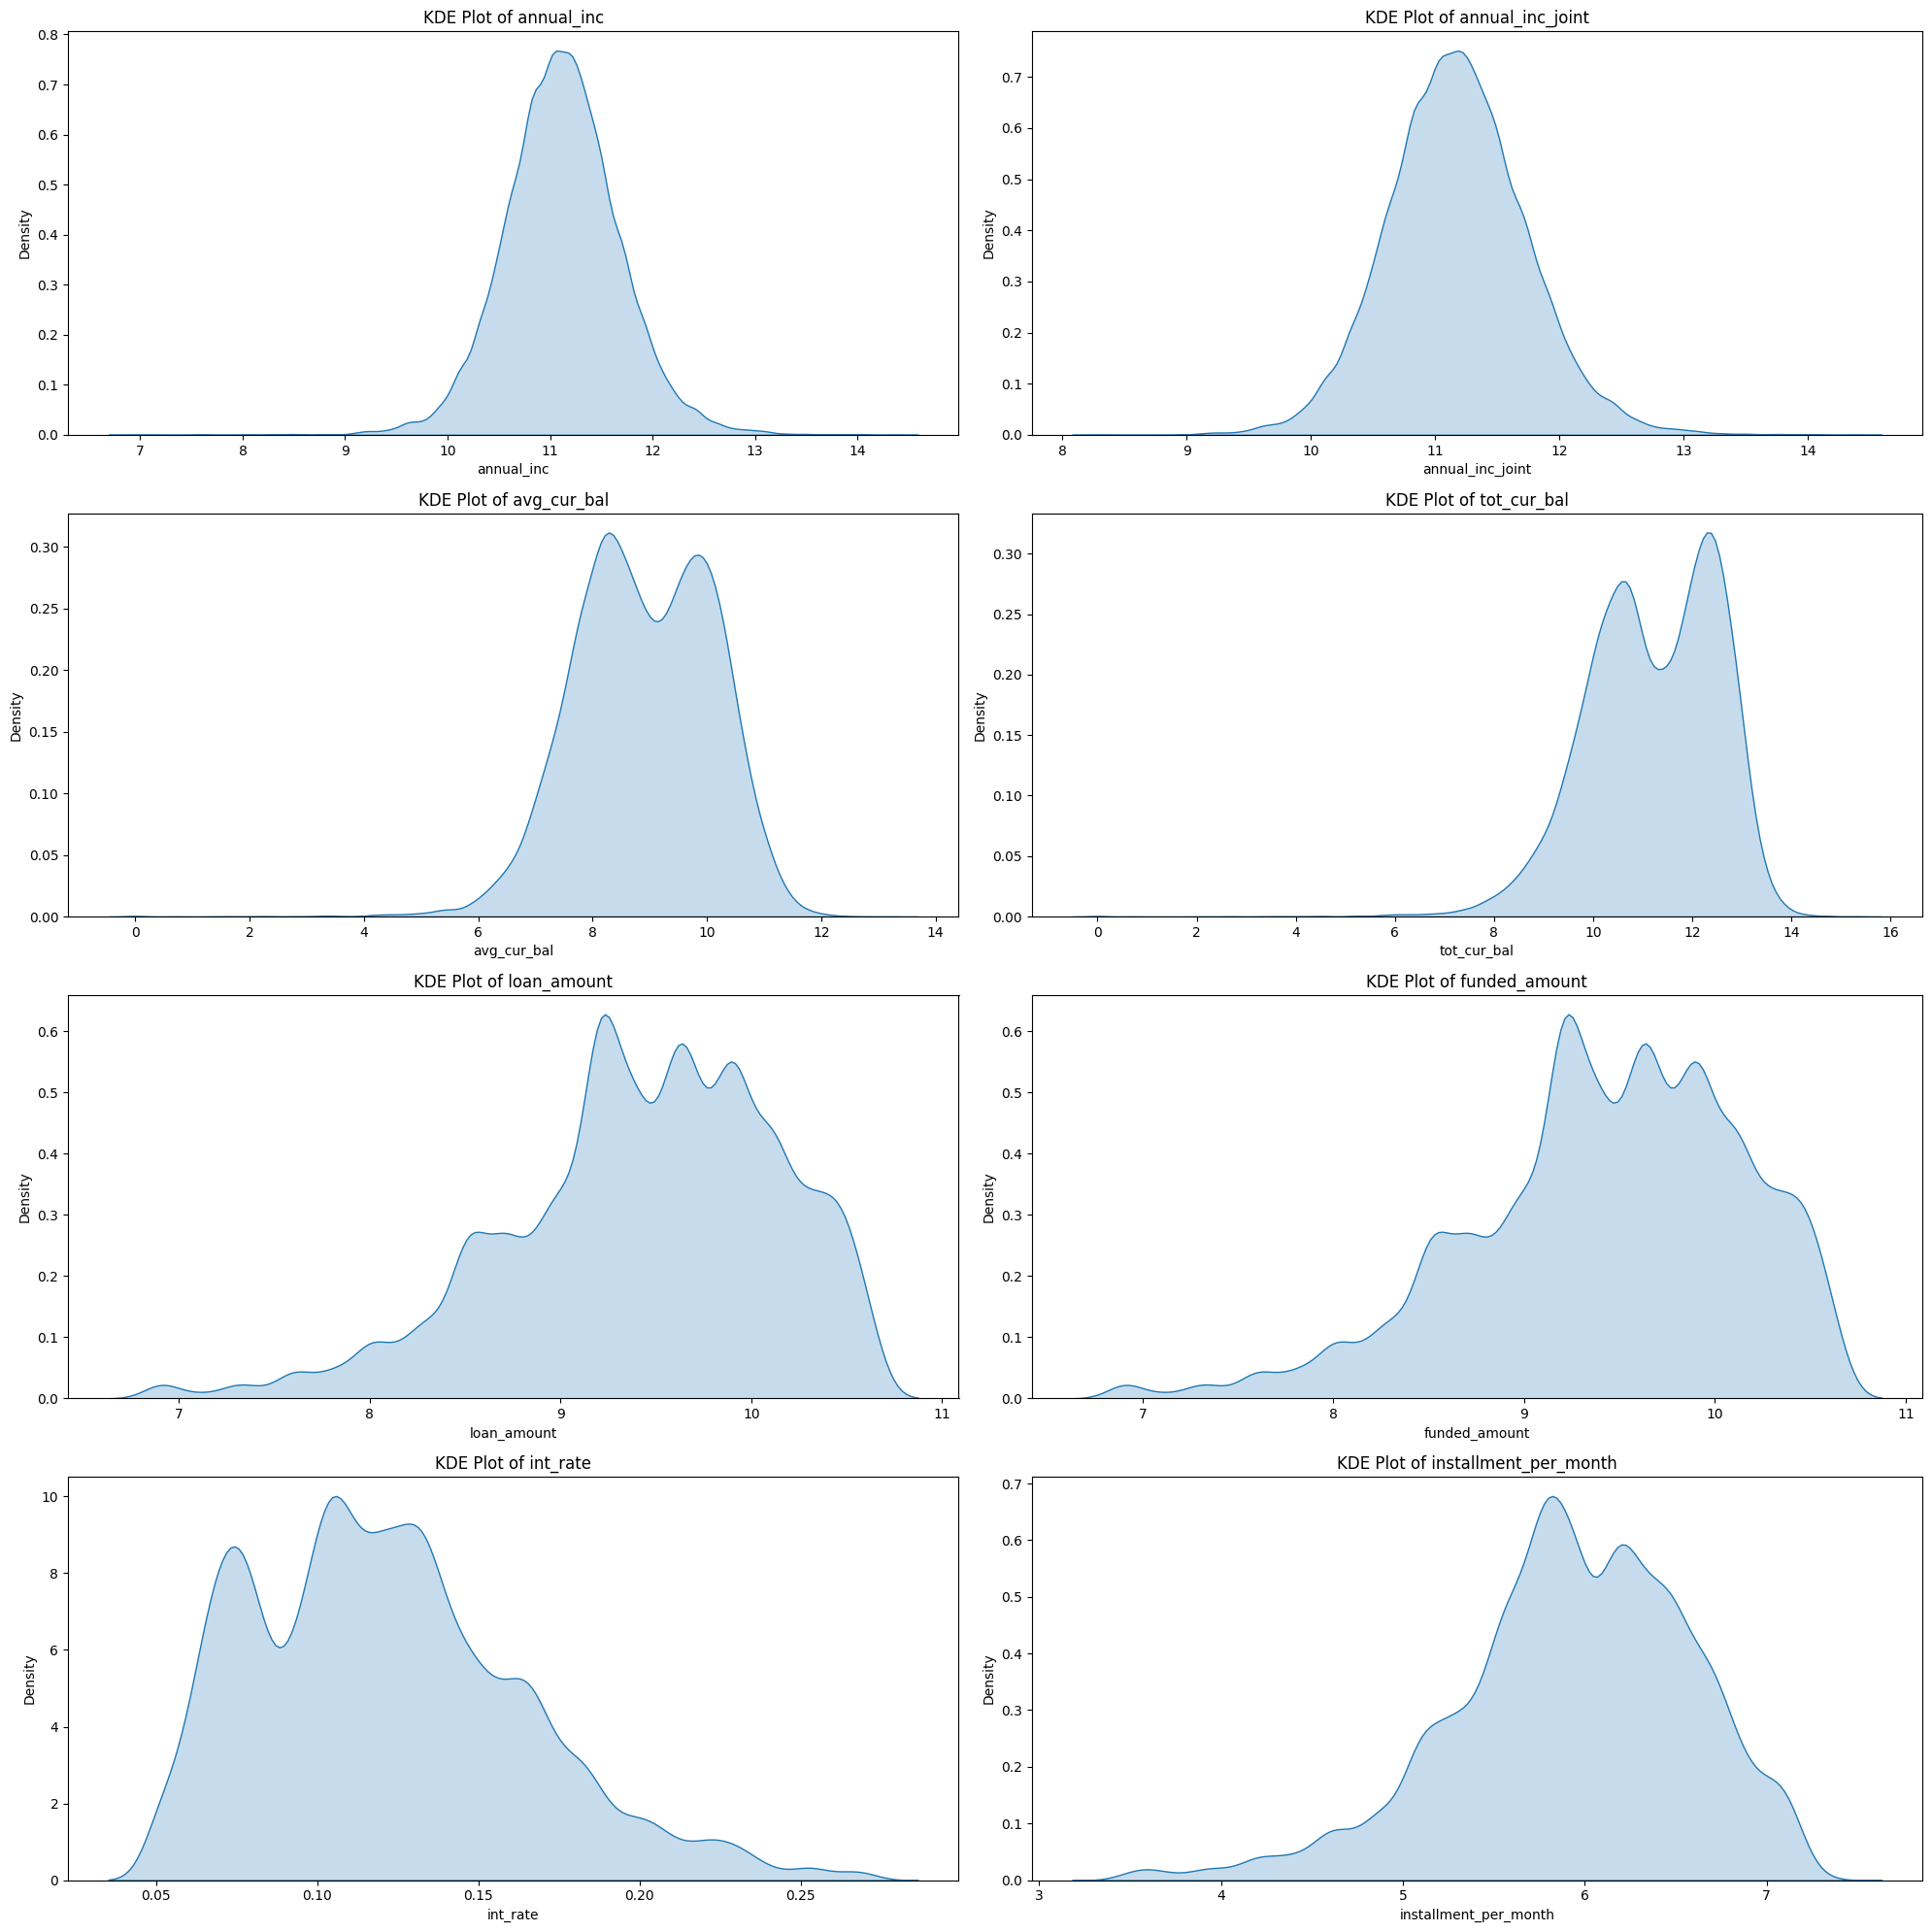

In [100]:
# Calculate the number of rows needed
num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols  # Ceiling division

# Plot KDE graphs for all numeric columns
plt.figure(figsize=(20, 5 * num_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data_log_transformed[col], fill=True)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [101]:
from scipy.stats import skew

# Calculate skewness for all numeric columns
skewness_values = {
    col: skew(data_log_transformed[col].dropna()) for col in numeric_cols}

# Display the skewness values
skewness_values

{'annual_inc': 0.0536722009913736,
 'annual_inc_joint': 0.18641184939679234,
 'avg_cur_bal': -0.3683098705181425,
 'tot_cur_bal': -0.6541054344170885,
 'loan_amount': -0.6708373297570192,
 'funded_amount': -0.6708373297570192,
 'int_rate': 0.6317009220919081,
 'installment_per_month': -0.6047316858579441}

> annual income became normally distributed after log transform while other columns still aren't normally distributed and some actually skewed to the other side (left skewed instead of right skewed)

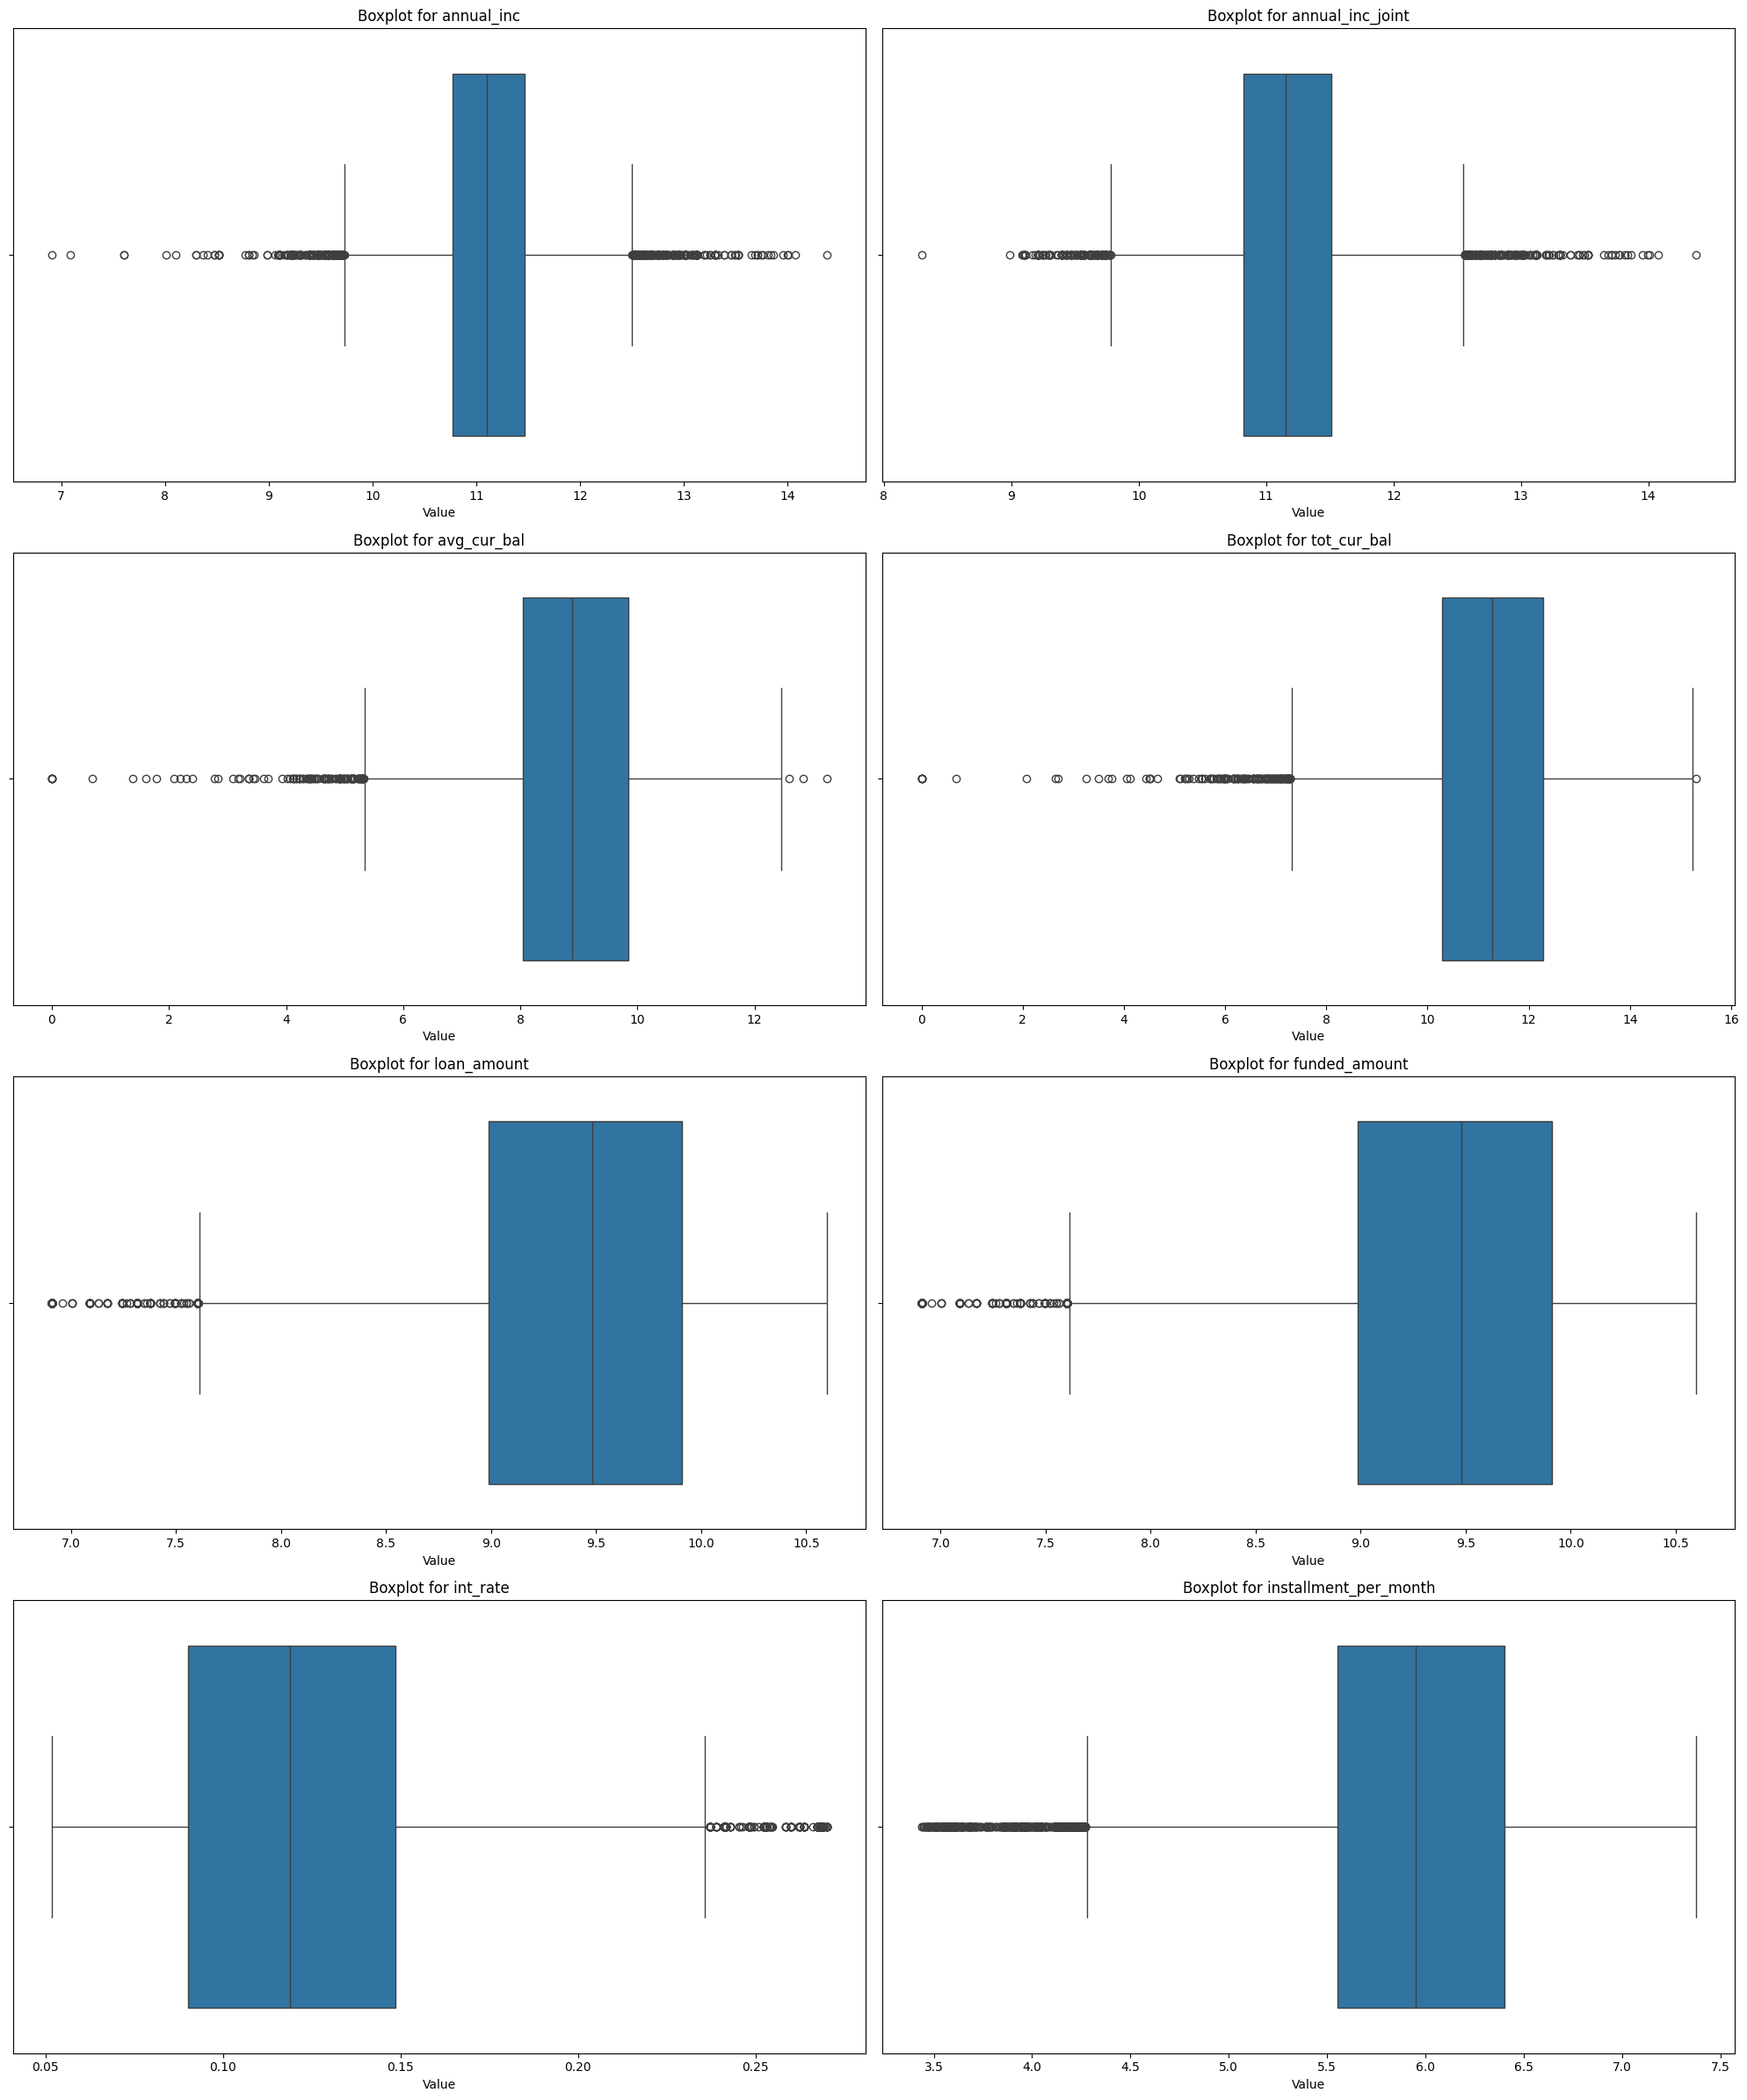

In [102]:
# Number of columns per row
cols_per_row = 2

# Calculate the number of rows needed
num_rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Looping through each numeric column and creating a horizontal boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data_log_transformed[col], orient='h', ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel('Value')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [103]:
outlier_percentages_transformed = {col: calculate_iqr_outliers(
    data_log_transformed[col]) for col in numeric_cols}
for col, percentage in outlier_percentages_transformed.items():
    print(f'Percentage of Outliers in {col}: {percentage:.3f}%')

Percentage of Outliers in annual_inc: 2.075%
Percentage of Outliers in annual_inc_joint: 1.813%
Percentage of Outliers in avg_cur_bal: 0.414%
Percentage of Outliers in tot_cur_bal: 0.503%
Percentage of Outliers in loan_amount: 1.998%
Percentage of Outliers in funded_amount: 1.998%
Percentage of Outliers in int_rate: 1.036%
Percentage of Outliers in installment_per_month: 1.924%


In [104]:
# Calculate the difference between outlier percentages and outlier percentages transformed
outlier_diff = {col: outlier_percentages[col] - outlier_percentages_transformed[col] for col in outlier_percentages}

# Display the differences
outlier_diff

{'annual_inc': 2.9226785053644093,
 'annual_inc_joint': 3.399926008139105,
 'avg_cur_bal': 5.12393636699963,
 'tot_cur_bal': 3.1446540880503147,
 'loan_amount': 0.414354421013688,
 'funded_amount': 0.414354421013688,
 'int_rate': 0.40325564187939333,
 'installment_per_month': 1.2097669256381798}

> using log transform reduced outlier percentage of all columns especially avg cur bal where outlier percentage decreased by 5%

#### Here I was testing Capping to remove the rest of the outliers but then realised it doesnt make sense for monetary values so ignore it
(keeping it here for myself as reference later) 

In [105]:
# def cap_outliers(df, lower_percentile=0.05, upper_percentile=0.95):
#     numeric_cols = df.select_dtypes(include=[np.number]).columns
#     capped_df = df.copy()

#     for col in numeric_cols:
#         lower_cap = df[col].quantile(lower_percentile)
#         upper_cap = df[col].quantile(upper_percentile)
#         capped_df[col] = np.where(df[col] < lower_cap, lower_cap, np.where(
#             df[col] > upper_cap, upper_cap, df[col]))

#     return capped_df

In [106]:
# # Apply the function to cap outliers for all numeric columns
# capped_df = cap_outliers(data_log_transformed)

# capped_df

In [107]:
# # Calculate the number of rows needed
# num_cols = 2
# num_rows = (len(numeric_cols) + num_cols - 1) // num_cols  # Ceiling division

# # Plot KDE graphs for all numeric columns
# plt.figure(figsize=(20, 5 * num_rows))
# for i, col in enumerate(numeric_cols, 1):
#     plt.subplot(num_rows, num_cols, i)
#     sns.kdeplot(data_log_transformed[col], fill=True, label='Log Transformed')
#     sns.kdeplot(capped_df[col], fill=True, label = 'Log Transformed and Capped')
#     plt.title(f'KDE Plot of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Density')
#     plt.legend()

# plt.tight_layout()
# plt.show()

In [108]:
# # Number of columns per row
# cols_per_row = 2

# # Calculate the number of rows needed
# num_rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row

# # Create subplots
# fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 6))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Looping through each numeric column and creating a horizontal boxplot
# for i, col in enumerate(numeric_cols):
#     sns.boxplot(x=capped_df[col], orient='h', ax=axes[i])
#     axes[i].set_title(f'Boxplot for {col}')
#     axes[i].set_xlabel('Value')

# # Remove any unused subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

> after capping we have no more outliers

# 5 - Data transformation and feature eng.

## 5.1 - Adding Columns

### Month Number

In [109]:
data_log_transformed['month_number'] = data_log_transformed['issue_date_datetime'].dt.month
data_log_transformed[['issue_date', 'month_number']]

,issue_date,month_number
customer_id,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,15 October 2015,10
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,19 August 2019,8
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,15 June 2015,6
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,16 May 2016,5
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,19 June 2019,6
...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,16 February 2016,2
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,18 February 2018,2
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,18 October 2018,10


In [110]:
data_log_transformed['month_number'].dtype

dtype('int32')

### Salary Can Cover

For this column we check if *annual_inc_joint* is greater than or equal to *loan amount*
<br>
This step is performed after log transform but still holds true as applying log to both sides maintains the inequality (result from x <= y is the same as log(x) <= log(y)) since theree are no negative numbers or 0s 
<br>
We use annual inc joint as for individual loans we already imputed annual inc joint with the value in annual inc and for joint loans as they're paying together so it makes sense to compare joint income rather than individual income

In [111]:
data_log_transformed['salary_can_cover'] = (
    data_log_transformed['annual_inc_joint'] >= data_log_transformed['loan_amount'])
data_log_transformed[['salary_can_cover']].value_counts()

salary_can_cover
True                27027
False                   3
Name: count, dtype: int64

### Letter Grade (already done)

In [112]:
data_log_transformed[['grade', 'letter_grade', 'grade_encoded']]

,grade,letter_grade,grade_encoded
customer_id,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,23,E,4
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,6,B,1
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,10,B,1
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,15,C,2
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,15,C,2
...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,14,C,2
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,4,A,0
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,5,A,0


### Installment per month (already done)

this is after log transform of installment per month

In [113]:
data_log_transformed[['installment_per_month']]

,installment_per_month
customer_id,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,6.399567
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,5.794482
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,6.319394
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,5.920333
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,5.336572
...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,5.994732
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,4.144320
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,6.758490


## 5.2 - Encoding

encode Term with 0 or 1? 36 or 60? 

checking which columns need encoding

In [114]:
categorical_columns = data_log_transformed.select_dtypes(include=['object'])
categorical_columns

,emp_title,emp_length,home_ownership,verification_status,zip_code,addr_state,loan_status,state,term,issue_date,type,purpose,description,letter_grade,state_name
customer_id,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,10+ years,OWN,Not Verified,461xx,IN,Charged Off,IN,60 months,15 October 2015,INDIVIDUAL,credit_card,Credit card refinancing,E,Indiana
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,3 years,RENT,Source Verified,917xx,CA,Current,CA,36 months,19 August 2019,INDIVIDUAL,medical,Medical expenses,B,California
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,7 years,RENT,Source Verified,840xx,UT,Fully Paid,UT,36 months,15 June 2015,INDIVIDUAL,debt_consolidation,Debt consolidation,B,Utah
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,4 years,MORTGAGE,Not Verified,783xx,TX,Current,TX,36 months,16 May 2016,INDIVIDUAL,debt_consolidation,Debt consolidation,C,Texas
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,< 1 year,RENT,Source Verified,021xx,MA,Current,MA,36 months,19 June 2019,INDIVIDUAL,vacation,Vacation,C,Massachusetts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,Unit Mgr/ER,10+ years,RENT,Not Verified,926xx,CA,Fully Paid,CA,60 months,16 February 2016,INDIVIDUAL,debt_consolidation,Debt consolidation,C,California
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,Product Engineer,2 years,MORTGAGE,Not Verified,014xx,MA,Current,MA,36 months,18 February 2018,INDIVIDUAL,credit_card,Credit card refinancing,A,Massachusetts
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,Officer,10+ years,MORTGAGE,Not Verified,774xx,TX,Current,TX,36 months,18 October 2018,JOINT,credit_card,Credit card refinancing,A,Texas


> emp_title, zipcode, description, addr_state, state, state_name will not be encoded as they have no reason to be?

> home ownership, verification status, type and purpose columns will be one-hot encoded as they have no ordinal property so they cannot be label encoded

> type will be label encoded by simply removing the "months" word and converting the column to numeric

> loan status will be label encoded as well according to decided on labels below

>letter grade is already label encoded previously into the column grade_encoded and issue date is encoded as a datetime. emp_length was also manually encoded into emp length encoded

#### Already Encoded 

In [115]:
data_log_transformed[['letter_grade', 'grade_encoded',
           'issue_date', 'issue_date_datetime', 'emp_length','emp_length_encoded']].head()

,letter_grade,grade_encoded,issue_date,issue_date_datetime,emp_length,emp_length_encoded
customer_id,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,E,4,15 October 2015,2015-10-15,10+ years,10.0
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,B,1,19 August 2019,2019-08-19,3 years,3.0
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,B,1,15 June 2015,2015-06-15,7 years,7.0
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,C,2,16 May 2016,2016-05-16,4 years,4.0
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,C,2,19 June 2019,2019-06-19,< 1 year,0.0


#### Will Encode

In [116]:
print(pd.DataFrame(data_log_transformed['loan_status'].value_counts()))
print(pd.DataFrame(data_log_transformed['home_ownership'].value_counts()))
print(pd.DataFrame(data_log_transformed['verification_status'].value_counts()))
print(pd.DataFrame(data_log_transformed['term'].value_counts()))
print(pd.DataFrame(data_log_transformed['type'].value_counts()))
print(pd.DataFrame(data_log_transformed['purpose'].value_counts()))

                    count
loan_status              
Current             17065
Fully Paid           7683
Charged Off          1760
Late (31-120 days)    300
In Grace Period       150
Late (16-30 days)      70
Default                 2
                count
home_ownership       
MORTGAGE        13256
RENT            10628
OWN              3110
ANY                35
OTHER               1
                     count
verification_status       
Source Verified      10686
Not Verified          9673
Verified              6671
           count
term            
36 months  18940
60 months   8090
            count
type             
INDIVIDUAL  25079
JOINT        1918
DIRECT_PAY     33
                    count
purpose                  
debt_consolidation  15130
credit_card          6609
home_improvement     1675
other                1622
major_purchase        585
medical               307
car                   275
small_business        268
house                 194
vacation              180
moving 

##### One-Hot Encoding

In [125]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['home_ownership',
                     'verification_status', 'type', 'purpose']

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Perform one-hot encoding on the specified columns
encoded_columns = encoder.fit_transform(
    data_log_transformed[columns_to_encode]).toarray()

# Get the feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(
    columns_to_encode)

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_feature_names).set_index(data_log_transformed.index)

# Concatenate the original DataFrame with the encoded DataFrame
df_encoded = pd.concat([data_log_transformed.drop(
    columns=columns_to_encode), encoded_df], axis=1)

In [126]:
df_encoded

,emp_title,emp_length,annual_inc,annual_inc_joint,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name,installment_per_month,month_number,salary_can_cover,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,type_DIRECT_PAY,type_INDIVIDUAL,type_JOINT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,10+ years,11.156265,11.156265,461xx,IN,9.051345,12.186706,213592,Charged Off,10.065861,IN,10.065861,60 months,0.167631,23,15 October 2015,False,Credit card refinancing,10.0,E,4,2015-10-15,Indiana,6.399567,10,True,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,3 years,11.289794,11.289794,917xx,CA,7.969358,9.760656,90990,Current,9.210440,CA,9.210440,36 months,0.104540,6,19 August 2019,False,Medical expenses,3.0,B,1,2019-08-19,California,5.794482,8,True,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,7 years,11.289794,11.289794,840xx,UT,8.536996,11.532522,171258,Fully Paid,9.729194,UT,9.729194,36 months,0.109123,10,15 June 2015,False,Debt consolidation,7.0,B,1,2015-06-15,Utah,6.319394,6,True,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,4 years,11.082158,11.082158,783xx,TX,10.228718,12.793632,108300,Current,9.287394,TX,9.287394,36 months,0.135055,15,16 May 2016,False,Debt consolidation,4.0,C,2,2016-05-16,Texas,5.920333,5,True,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,< 1 year,11.010415,11.010415,021xx,MA,8.332308,10.634749,47169,Current,8.703839,MA,8.703839,36 months,0.133656,15,19 June 2019,False,Vacation,0.0,C,2,2019-06-19,Massachusetts,5.336572,6,True,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,Unit Mgr/ER,10+ years,11.156265,11.156265,926xx,CA,8.473241,11.038094,179824,Fully Paid,9.798183,CA,9.798183,60 months,0.113239,14,16 February 2016,False,Debt consolidation,10.0,C,2,2016-02-16,California,5.994732,2,True,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,Product Engineer,2 years,11.626263,11.626263,014xx,MA,10.645473,12.254901,3790,Current,7.601402,MA,7.601402,36 months,

##### Label Encoding

term

In [127]:
# Remove the "months" word and convert to integer
df_encoded['term'] = data_log_transformed['term'].str.replace(
    ' months', '').astype(int)

In [128]:
# Create a dictionary to map employment lengths to numeric values
term_mapping = {
    '36 months': 36,
    '60 months': 60,
}

term_mapping_df = pd.DataFrame(
    list(term_mapping.items()), columns=['original', 'imputed'])

term_mapping_df['column'] = 'term'

LookupTable = pd.concat(
    [LookupTable, term_mapping_df], ignore_index=True)
LookupTable

,column,original,imputed
0,emp_length,< 1 year,0.0
1,emp_length,1 year,1.0
2,emp_length,2 years,2.0
3,emp_length,3 years,3.0
4,emp_length,4 years,4.0
5,emp_length,5 years,5.0
6,emp_length,6 years,6.0
7,emp_length,7 years,7.0
8,emp_length,8 years,8.0
9,emp_length,9 years,9.0


In [129]:
# Verify the changes
df_encoded[['term']]

,term
customer_id,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,60
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,36
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,36
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,36
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,36
...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,60
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,36
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,36


loan status

In [130]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the loan_status column
df_encoded['loan_status'] = label_encoder.fit_transform(
    data_log_transformed['loan_status'])

label_mapping = dict(
    zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

df_encoded

Label Encoding Mapping: {'Charged Off': 0, 'Current': 1, 'Default': 2, 'Fully Paid': 3, 'In Grace Period': 4, 'Late (16-30 days)': 5, 'Late (31-120 days)': 6}


,emp_title,emp_length,annual_inc,annual_inc_joint,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,description,emp_length_encoded,letter_grade,grade_encoded,issue_date_datetime,state_name,installment_per_month,month_number,salary_can_cover,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,type_DIRECT_PAY,type_INDIVIDUAL,type_JOINT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,10+ years,11.156265,11.156265,461xx,IN,9.051345,12.186706,213592,0,10.065861,IN,10.065861,60,0.167631,23,15 October 2015,False,Credit card refinancing,10.0,E,4,2015-10-15,Indiana,6.399567,10,True,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,3 years,11.289794,11.289794,917xx,CA,7.969358,9.760656,90990,1,9.210440,CA,9.210440,36,0.104540,6,19 August 2019,False,Medical expenses,3.0,B,1,2019-08-19,California,5.794482,8,True,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,7 years,11.289794,11.289794,840xx,UT,8.536996,11.532522,171258,3,9.729194,UT,9.729194,36,0.109123,10,15 June 2015,False,Debt consolidation,7.0,B,1,2015-06-15,Utah,6.319394,6,True,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,4 years,11.082158,11.082158,783xx,TX,10.228718,12.793632,108300,1,9.287394,TX,9.287394,36,0.135055,15,16 May 2016,False,Debt consolidation,4.0,C,2,2016-05-16,Texas,5.920333,5,True,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,< 1 year,11.010415,11.010415,021xx,MA,8.332308,10.634749,47169,1,8.703839,MA,8.703839,36,0.133656,15,19 June 2019,False,Vacation,0.0,C,2,2019-06-19,Massachusetts,5.336572,6,True,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,Unit Mgr/ER,10+ years,11.156265,11.156265,926xx,CA,8.473241,11.038094,179824,3,9.798183,CA,9.798183,60,0.113239,14,16 February 2016,False,Debt consolidation,10.0,C,2,2016-02-16,California,5.994732,2,True,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,Product Engineer,2 years,11.626263,11.626263,014xx,MA,10.645473,12.254901,3790,1,7.601402,MA,7.601402,36,0.070924,4,18 February 2018,False,Credit card refinancing,2.0,A,0,2018-02-18,Massachusetts,4.144320,2

In [131]:
# Get the mapping dictionary
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

# Convert the label mapping to a DataFrame
label_mapping_df = pd.DataFrame(
    list(label_mapping.items()), columns=['imputed', 'original'])

# Add the 'column' column with the value 'loan_status'
label_mapping_df['column'] = 'loan_status'

# Reorder the columns to match the desired order
label_mapping_df = label_mapping_df[['column', 'imputed', 'original']]

# Display the DataFrame
print(label_mapping_df)

        column  imputed            original
0  loan_status        0         Charged Off
1  loan_status        1             Current
2  loan_status        2             Default
3  loan_status        3          Fully Paid
4  loan_status        4     In Grace Period
5  loan_status        5   Late (16-30 days)
6  loan_status        6  Late (31-120 days)


In [132]:
# Concatenate the new DataFrame with the existing lookup table DataFrame
LookupTable = pd.concat(
    [LookupTable, label_mapping_df], ignore_index=True)
LookupTable

,column,original,imputed
0,emp_length,< 1 year,0.0
1,emp_length,1 year,1.0
2,emp_length,2 years,2.0
3,emp_length,3 years,3.0
4,emp_length,4 years,4.0
...,...,...,...
62,loan_status,Default,2
63,loan_status,Fully Paid,3
64,loan_status,In Grace Period,4
65,loan_status,Late (16-30 days),5


#### Removing any unencoded columns from encoded df

In [133]:
df_encoded = df_encoded.drop(columns=['emp_length', 'issue_date'])
df_encoded.rename(columns={'emp_length_encoded': 'emp_length', 'issue_date_datetime': 'issue_date'}, inplace=True)

## 5.3 - Normalization 

> Log transform normalization was already applied in the outlier handling section

Checking ranges of numeric values to judge if scaling is necessary

In [134]:
# Select numeric columns, excluding specified ones
numeric_cols = ['annual_inc','annual_inc_joint','avg_cur_bal','tot_cur_bal','funded_amount','installment_per_month','int_rate','loan_amount']

# Calculate the maximum and minimum values for each numeric column
numeric_max = df_encoded[numeric_cols].max()
numeric_min = df_encoded[numeric_cols].min()

# Combine the maximum and minimum values into a single DataFrame
max_min_df = pd.DataFrame({'max': numeric_max, 'min': numeric_min})

max_min_df

,max,min
annual_inc,14.375127,6.908755
annual_inc_joint,14.375127,8.294300
avg_cur_bal,13.228390,0.000000
tot_cur_bal,15.307830,0.000000
funded_amount,10.596660,6.908755
installment_per_month,7.377295,3.437538
int_rate,0.269951,0.051738
loan_amount,10.596660,6.908755


ranges are still relatively far apart so we will apply minmax scaler to get values between 0 and 1 as we want to maintain relationship between data and no more outliers remain

In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df_encoded.copy()
df_scaled[numeric_cols] = scaler.fit_transform(
    df_scaled[numeric_cols])
df_scaled[numeric_cols]

,annual_inc,annual_inc_joint,avg_cur_bal,tot_cur_bal,funded_amount,installment_per_month,int_rate,loan_amount
customer_id,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,0.568885,0.470654,0.684236,0.796109,0.856071,0.751830,0.531100,0.856071
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,0.586770,0.492613,0.602443,0.637625,0.624117,0.598246,0.241975,0.624117
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,0.586770,0.492613,0.645354,0.753374,0.764781,0.731481,0.262979,0.764781
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,0.558960,0.458467,0.773240,0.835757,0.644984,0.630190,0.381816,0.644984
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,0.549351,0.446669,0.629881,0.694726,0.486749,0.482018,0.375405,0.486749
...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,0.568885,0.470654,0.640535,0.721075,0.783488,0.649074,0.281841,0.783488
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,0.631834,0.547946,0.804744,0.800564,0.187816,0.179397,0.087924,0.187816
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,0.586770,0.584642,0.634417,0.747105,0.903288,0.842933,0.058803,0.903288


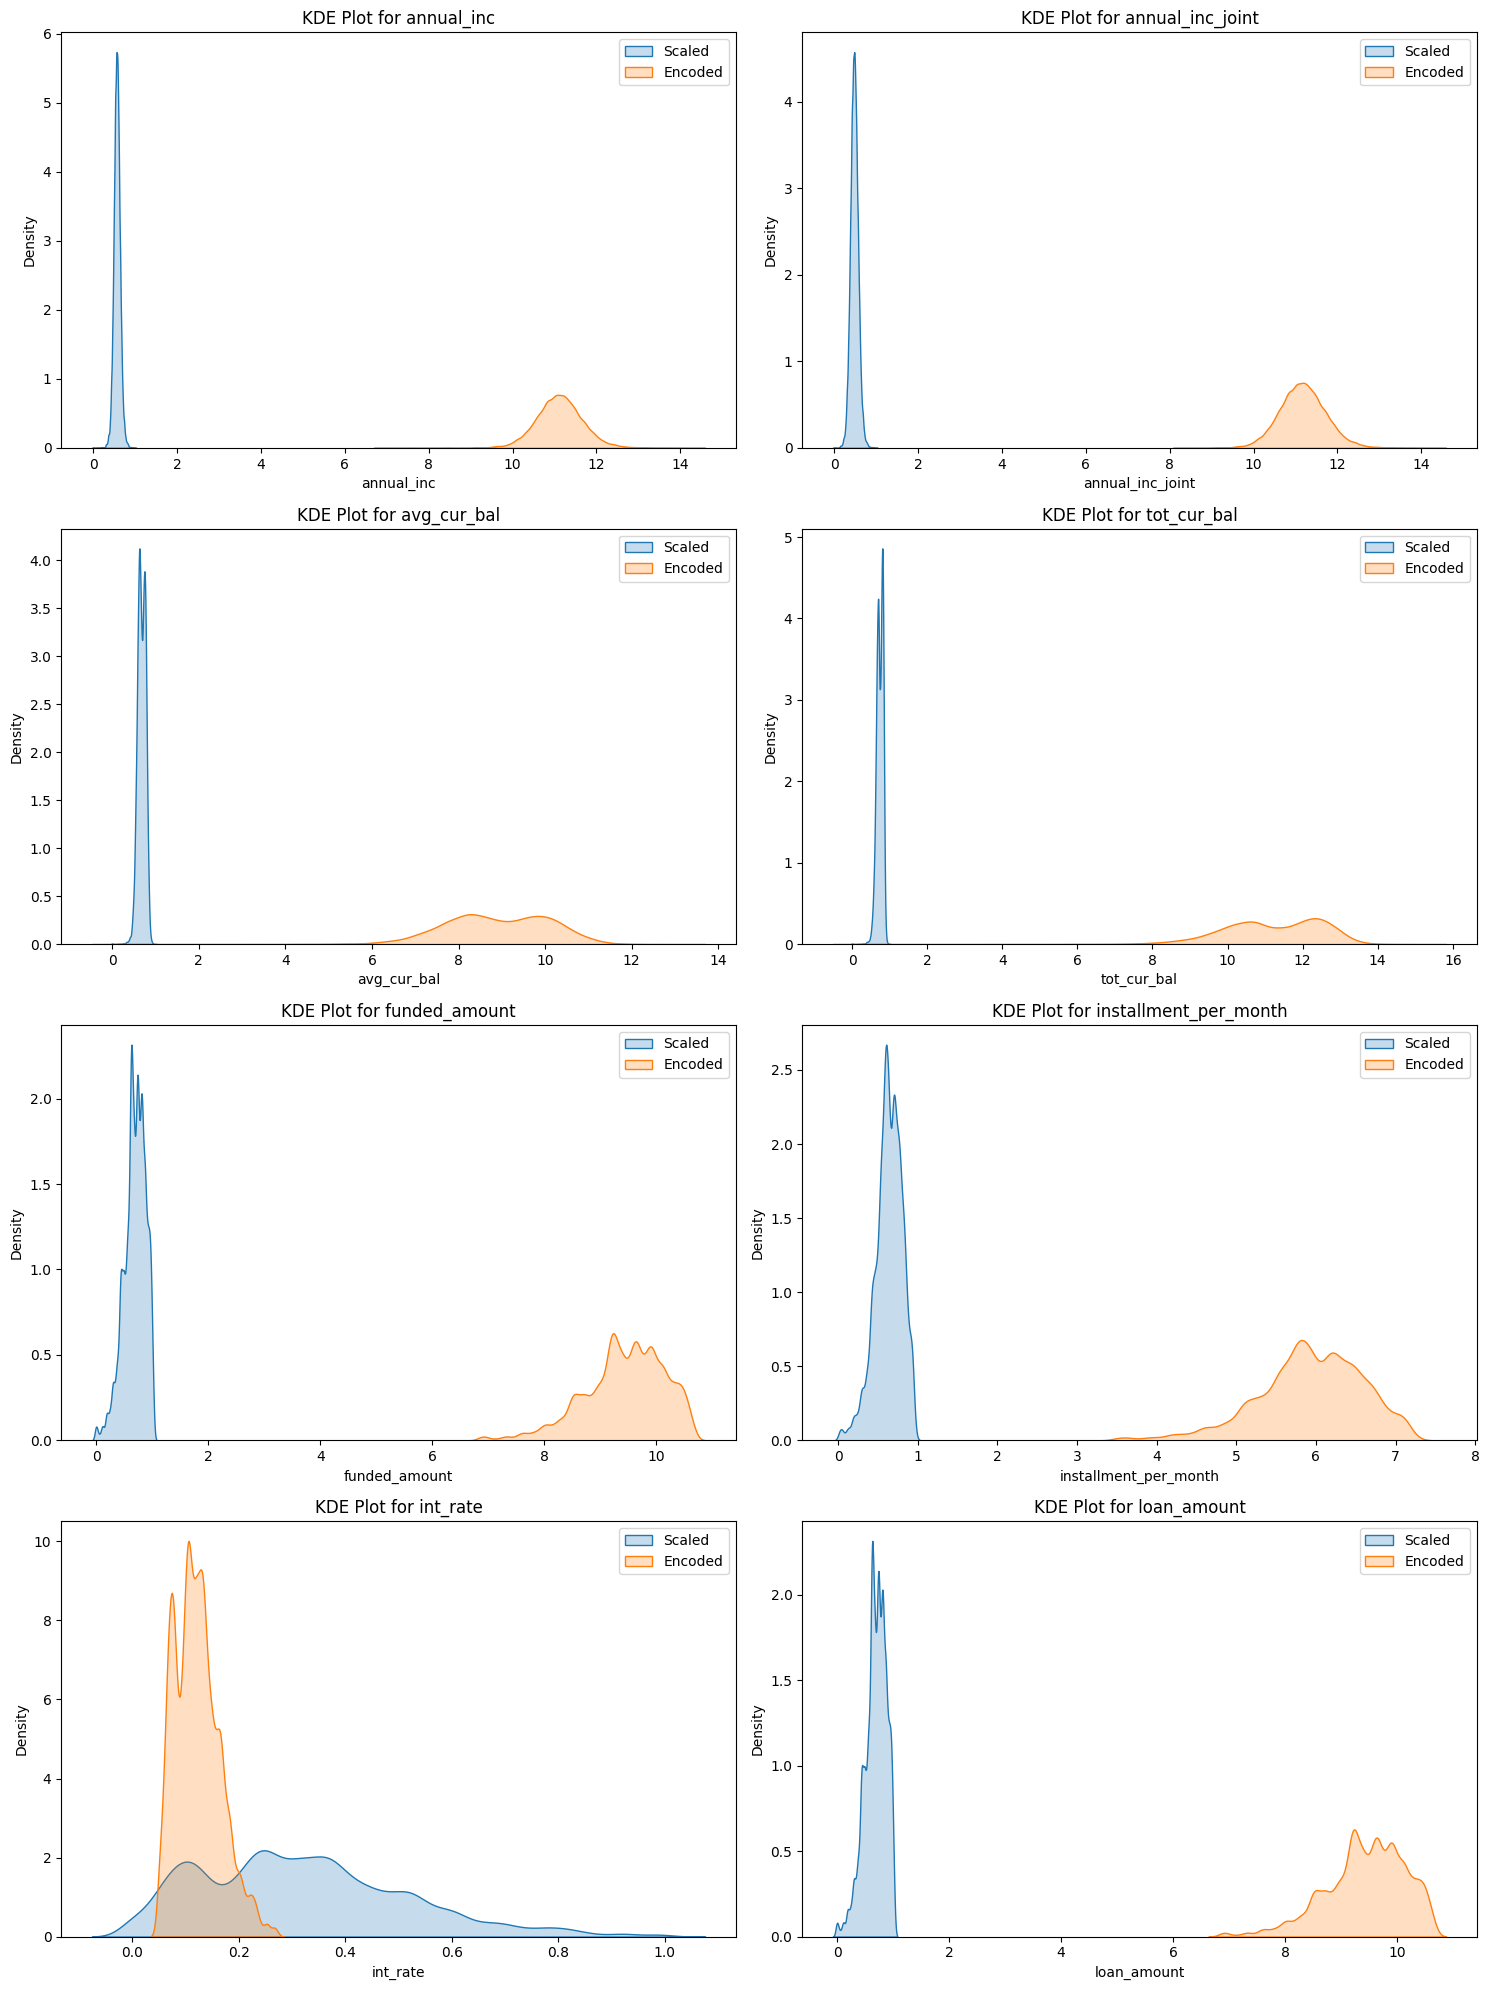

In [136]:
# Number of columns for subplots
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot KDE plots for each numeric column
for i, col in enumerate(numeric_cols):
    sns.kdeplot(df_scaled[col], label='Scaled', fill=True, ax=axes[i])
    sns.kdeplot(df_encoded[col], label='Encoded', fill=True, ax=axes[i])
    axes[i].set_title(f'KDE Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

>distribution shape is maintained however range is changed to 0-1 for all features

# 6 - Lookup Table(s)

In [137]:
pd.set_option('display.max_rows', None)
LookupTable

,column,original,imputed
0,emp_length,< 1 year,0.0
1,emp_length,1 year,1.0
2,emp_length,2 years,2.0
3,emp_length,3 years,3.0
4,emp_length,4 years,4.0
5,emp_length,5 years,5.0
6,emp_length,6 years,6.0
7,emp_length,7 years,7.0
8,emp_length,8 years,8.0
9,emp_length,9 years,9.0


In [138]:
pd.reset_option('display.max_rows')

In [139]:
LookupTable.to_csv('lookup_table.csv',index=False)

# 7- Exporting the dataframe to a csv file or parquet

In [140]:
df_scaled

,emp_title,annual_inc,annual_inc_joint,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,pymnt_plan,description,emp_length,letter_grade,grade_encoded,issue_date,state_name,installment_per_month,month_number,salary_can_cover,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,type_DIRECT_PAY,type_INDIVIDUAL,type_JOINT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceGM2XHhlOFx4MTFceDAzXHhkMVx4ZmJceDg3KUo0OFx4ODhceGRlY1x4YWVceDAyP1x4ZGRceDE4bFxuXHhkMk9ceGFmXHhjZFx4ZGRceGNjXHRceDgyXHhlMS1WJw==,Director of Operations,0.568885,0.470654,461xx,IN,0.684236,0.796109,213592,0,0.856071,IN,0.856071,60,0.531100,23,False,Credit card refinancing,10.0,E,4,2015-10-15,Indiana,0.751830,10,True,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YidVXHg4N1x4YjFceDk5Vlx4MDhwXHJceGYzXHhjOFx4OTBceGQxXHhlZVRceGMwXHgwNlx4YmNceDlmXVx4ODV+eVx4MDBceDE2a1x4ZGRceGIzXHhlYm4tI1gn,PROGRAMMER ENGINEER,0.586770,0.492613,917xx,CA,0.602443,0.637625,90990,1,0.624117,CA,0.624117,36,0.241975,6,False,Medical expenses,3.0,B,1,2019-08-19,California,0.598246,8,True,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
YicuXHgwZVx4ZTFceDA3XHg4Ylx4YTJceDk0XHg5NG5ceDE3XVx4MDdceDgxXHgxOVx4MGZceDg4XHhkOFx4OGQtXHg4N1x4YTJceGFmXHhmZFJcXGpwXHgxOFx4YjVLOVx4YjIn,Career Counselor,0.586770,0.492613,840xx,UT,0.645354,0.753374,171258,3,0.764781,UT,0.764781,36,0.262979,10,False,Debt consolidation,7.0,B,1,2015-06-15,Utah,0.731481,6,True,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YidceGJjXHhjMlx4YmJceDAxXG5aXHhiOVx4OWV5alx4MWNceGU5XHhjMSguTk5ceGJhXHJ3XHg5M1x4Y2FceGI5XHhmMVx4YjkgXHg4MSRceDExXHhkN29ceGMyJw==,Program Director/Instructor Medical Lab,0.558960,0.458467,783xx,TX,0.773240,0.835757,108300,1,0.644984,TX,0.644984,36,0.381816,15,False,Debt consolidation,4.0,C,2,2016-05-16,Texas,0.630190,5,True,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YidceGJlblx0Qlx4MWNceGE0LVx4YmJ+XHhhMSlNXHgxZVx4ZTBceGFlXHgxYUIrXHhhYVx4ZmJceDllXHhkMmJdXHhhMFl8XFxcdClceDFkXHg4OSc=,Truck driver,0.549351,0.446669,021xx,MA,0.629881,0.694726,47169,1,0.486749,MA,0.486749,36,0.375405,15,False,Vacation,0.0,C,2,2019-06-19,Massachusetts,0.482018,6,True,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceGU5XHg5ZVx4ODRceGIySlx4YmVMSlx4ZmQrXHg4ZTBZXHhjZFx4ZWVceDgzOFx4ZjhceGY1aiwqXHhiNFx4MWZceDAzXHhlMjkyXHhlNzxceGIzZCc=,Unit Mgr/ER,0.568885,0.470654,926xx,CA,0.640535,0.721075,179824,3,0.783488,CA,0.783488,60,0.281841,14,False,Debt consolidation,10.0,C,2,2016-02-16,California,0.649074,2,True,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YidceGE3XHhiNlx4YWYvXHhlM1x4ZTJceGE0IVx4ZTRceDBjIzNceGQxfFx4ZjkuXHhiOVx4Yzhdelx4MDRceGM5XHg5Nlx4MGZpJFx4YzdceGE2XHhhM1x4OWJceGU3Pyc=,Product Engineer,0.631834,0.547946,014xx,MA,0.804744,0.800564,3790,1,0.187816,MA,0.187816,36,0.087924,4,False,Credit card refinancing,2.0,A,0,2018-02-18,Massachusetts,0.179397,2,True,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YicsXHhmYlx4ZDVceDExRVFceDEzc258Olx4OTVYXHgxN1x4ZTRceGQ0XHhhMlx4YWJ5Plx4MDBcclx4OTRcclx4ZDNceGE4LWRceGUwNFxyXHhjMic=,Officer,0.586770,0

In [141]:
df_scaled.to_parquet(
    'fintech_data_MET_P1_52_16824_clean.parquet', index='pyarrow')